# **Latihan: Data Cleaning dan Transformation**

In [ ]:
import pandas as pd

train = pd.read_csv("/content/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Menampilkan statistik deskriptif dari dataset

train.describe(include = "all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [ ]:
# Memeriksa jumlah nilai yang hilang di setiap kolom

missing_values = train.isnull().sum()
missing_values[missing_values > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


# **Mengatasi Missing Value**

Perhatikan jumlah data yang hilang pada hasil kode sebelumnya, tentunya sangat banyak sekali data yang hilang ‘kan? Sebagai informasi jumlah data pada train.csv ini berjumlah 1460 baris sehingga jika salah satu fitur memiliki missing value lebih dari 1000, dapat kita asumsikan terlalu banyak data yang hilang. Lalu bagaimana solusinya?

Pertama-tama, mari kita pisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%.

In [ ]:
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

In [ ]:
numeric_features = train[less].select_dtypes(include = ['number']).columns
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

Secara singkat kode di atas memiliki dua fungsi utama yaitu sebagai berikut.

1. Baris pertama memilih nama-nama kolom dari DataFrame train yang memiliki  tipe data numerik dari subset kolom yang ditentukan oleh less.
2. Baris kedua kemudian mengisi semua nilai yang hilang (NaN) pada kolom-kolom numerik tersebut dengan nilai median dari masing-masing kolom.

Secara keseluruhan, kode ini bertujuan untuk membersihkan data dengan memastikan bahwa semua kolom numerik dalam subset tertentu (train[less]) tidak memiliki missing value (NaN) dengan menggantinya menggunakan nilai median kolom masing-masing.

Sedikit berbeda dengan kasus data numerik, pada kasus ini kita tidak bisa menggunakan median, mean, atau fungsi agregasi lainnya. Biasanya ada dua cara yang sering dilakukan untuk mengatasi permasalahan missing value pada data kategori.

 -  Mengisi Missing Value dengan Modus (Nilai yang Paling Sering Muncul): pendekatan ini cukup umum karena nilai modus sering kali merupakan representasi yang baik untuk data yang hilang dalam konteks kategorikal.
 -  Mengisi dengan Kategori Baru (Misalnya "Unknown" atau "Missing"): ini adalah cara lain untuk menangani missing value dengan menandai data yang hilang sebagai kategori baru.

Pada contoh kasus ini, mari kita atasi dengan mengisi missing value dengan modus atau nilai yang paling sering muncul pada masing-masing fitur.

In [ ]:
# Contoh mengisi nilai yang hilang dengan mode untuk kolom kategori
kategorical_features = train[less].select_dtypes(include=['object']).columns

for column in kategorical_features:
    train[column] = train[column].fillna(train[column].mode()[0])

Kode di atas akan melakukan pengulangan pada setiap kolom yang berisi data kategori dalam DataFrame train. Selanjutnya, setiap kolom kategori akan melakukan proses pergantian untuk semua nilai yang hilang (NaN) dengan nilai modus dari kolom tersebut. Hasil akhirnya adalah semua kolom kategori dalam DataFrame train tidak lagi memiliki nilai yang hilang (NaN) karena semua NaN telah diisi dengan nilai modus dari kolom masing-masing.

- Menghapus Kolom dengan Banyak Nilai yang Hilang:jika ada kolom dengan terlalu banyak nilai yang hilang, kita bisa mempertimbangkan untuk menghapusnya (pada kasus ini kita mengambil batasan 75%). Untuk mengatasi kasus ini sangatlah mudah, pertama Anda perlu mengambil index atau nama kolom dari fitur yang memiliki missing value lebih dari batasan yang sudah ditentukan (Anda dapat lihat kode ketika memisahkan kolom di atas). Kemudian hal yang perlu dilakukan adalah menghapus kolom tersebut sesuai dengan nama fitur yang sudah ditentukan sebelumnya

In [ ]:
# Menghapus kolom dengan terlalu banyak nilai yang hilang
train.drop(columns=over)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
# pemeriksaan terhadap data yang sudah melewati tahapan verifikasi missing value

missing_values[missing_values > 0]


,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


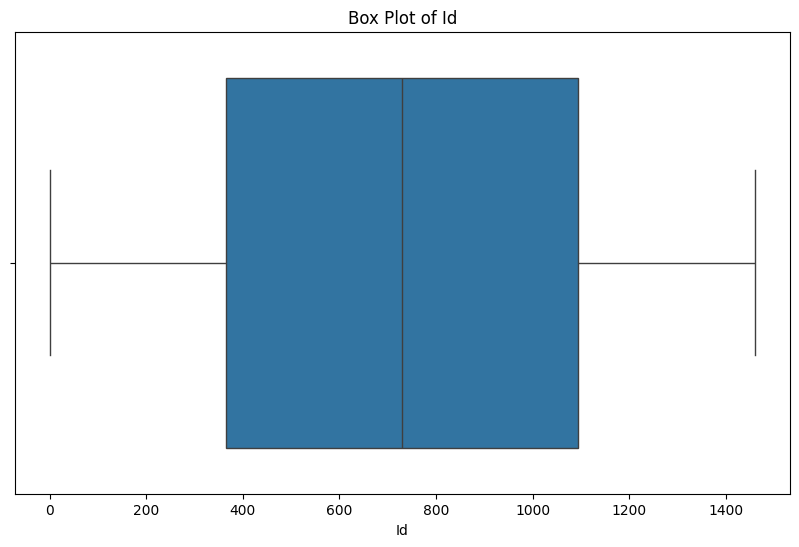

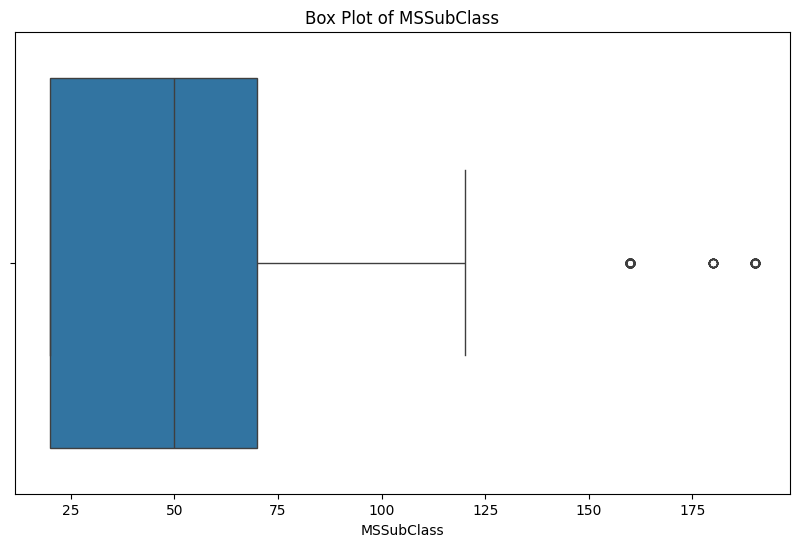

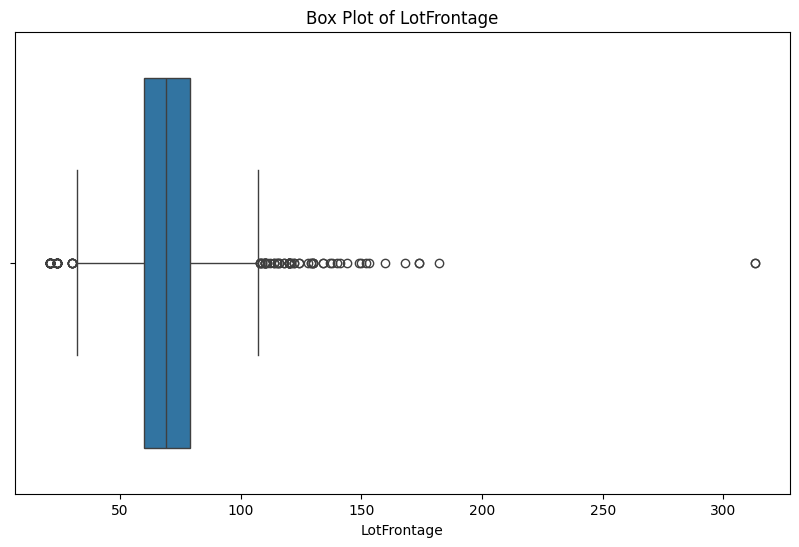

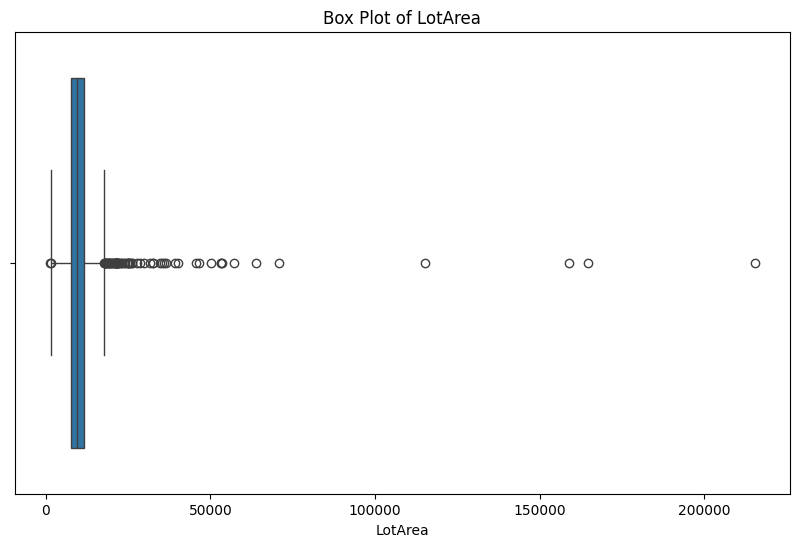

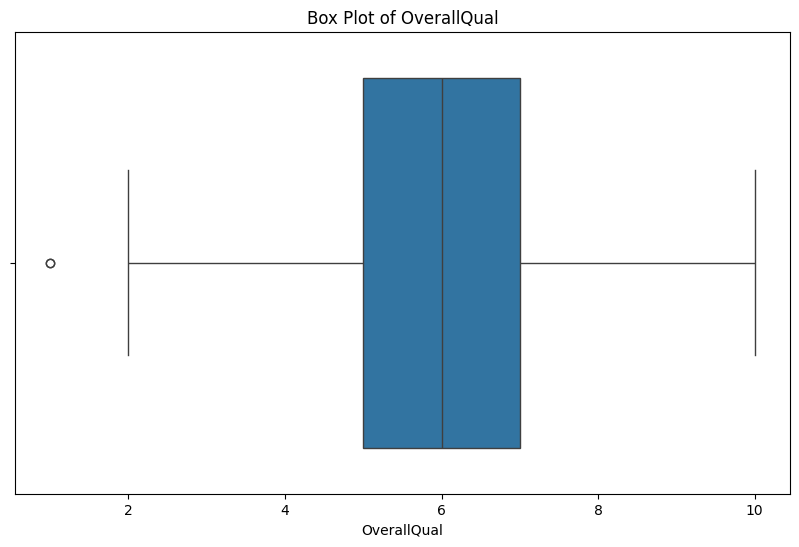

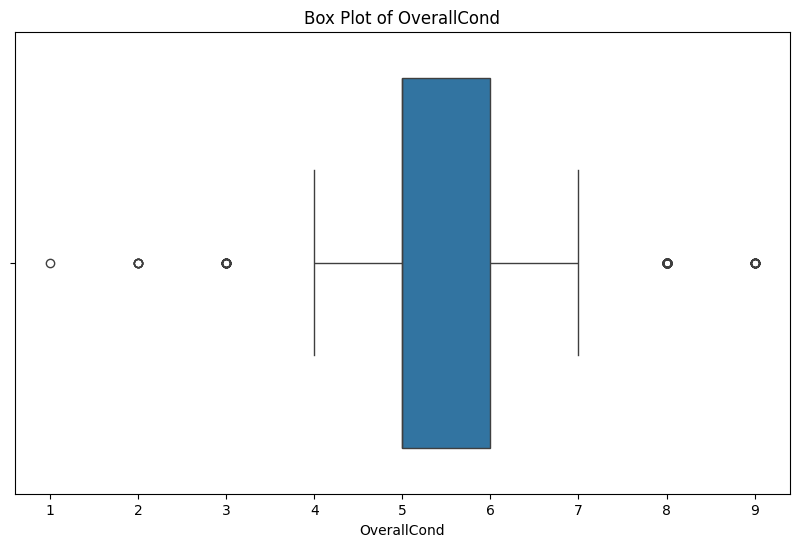

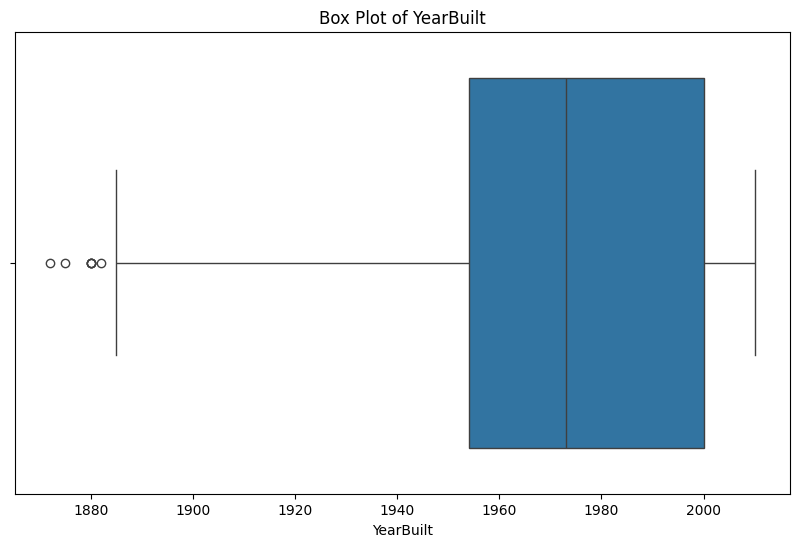

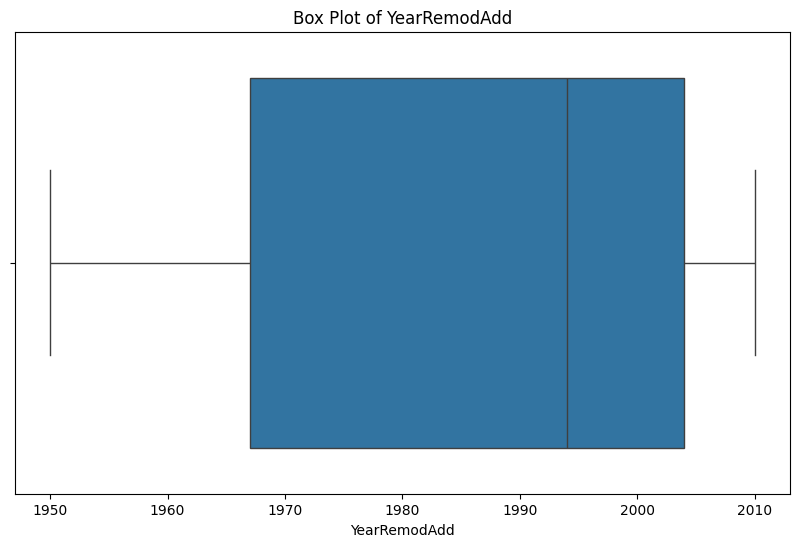

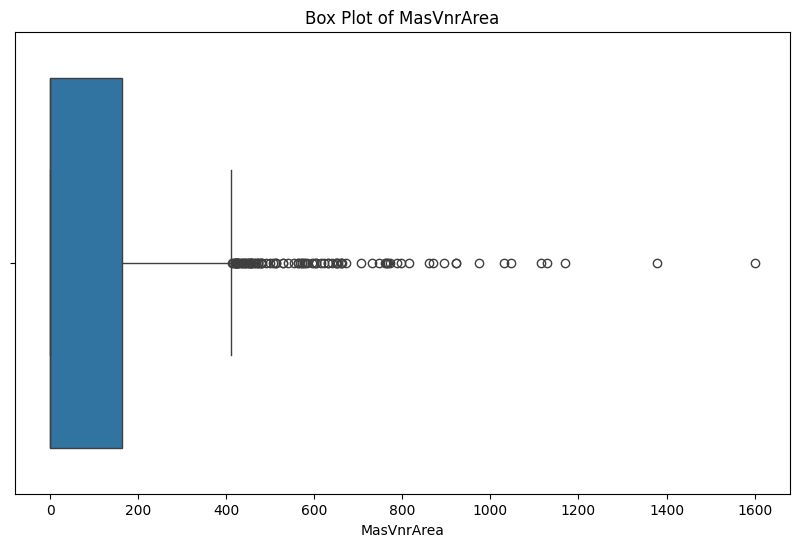

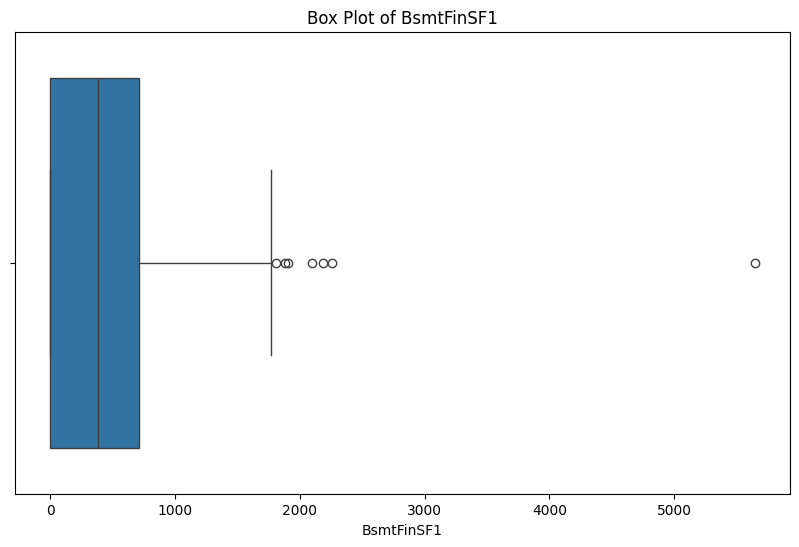

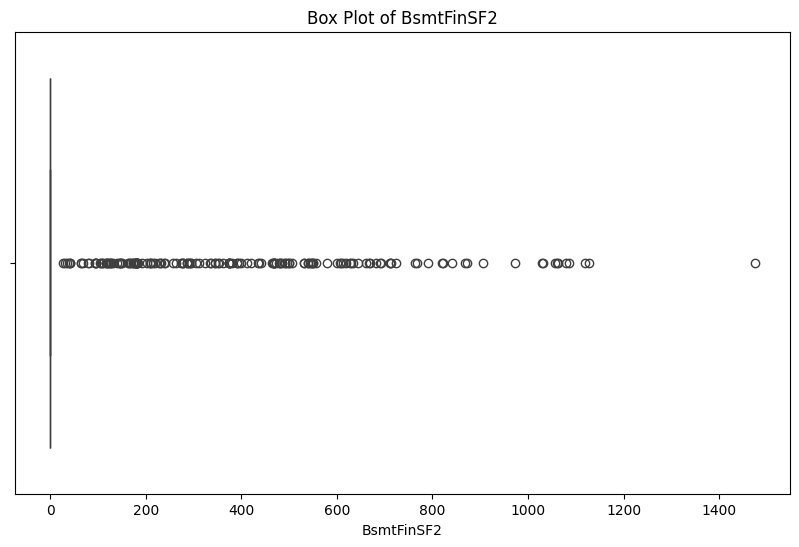

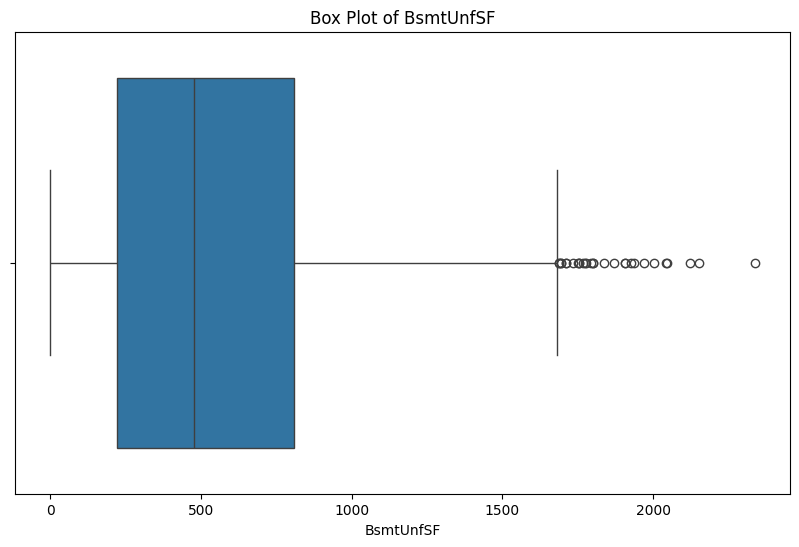

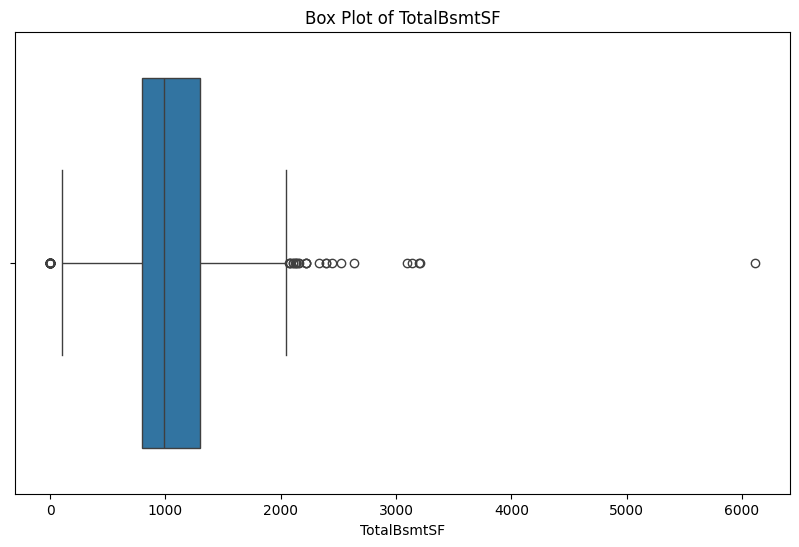

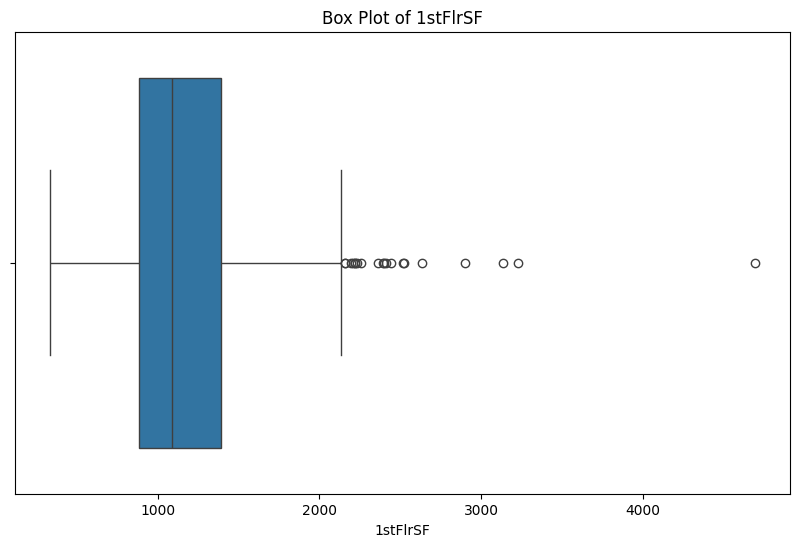

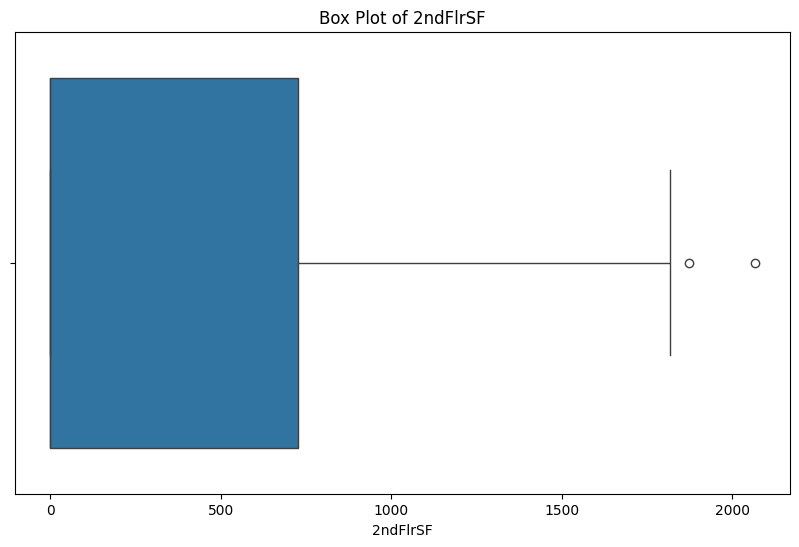

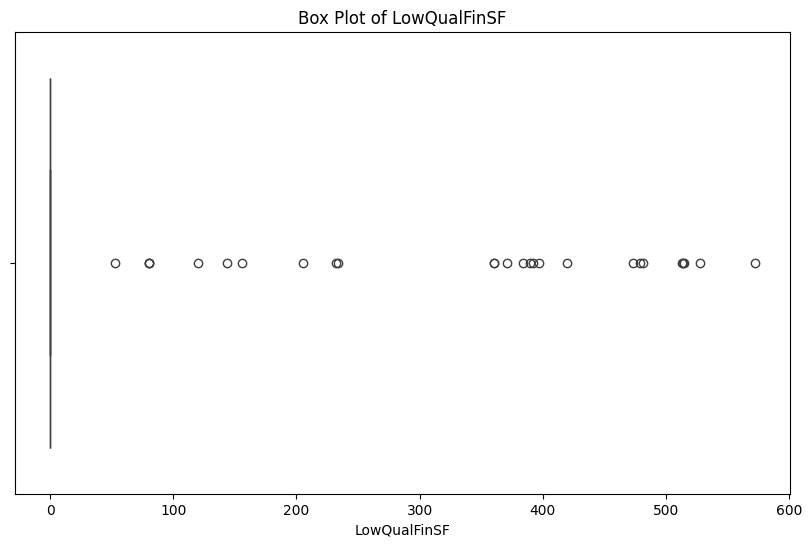

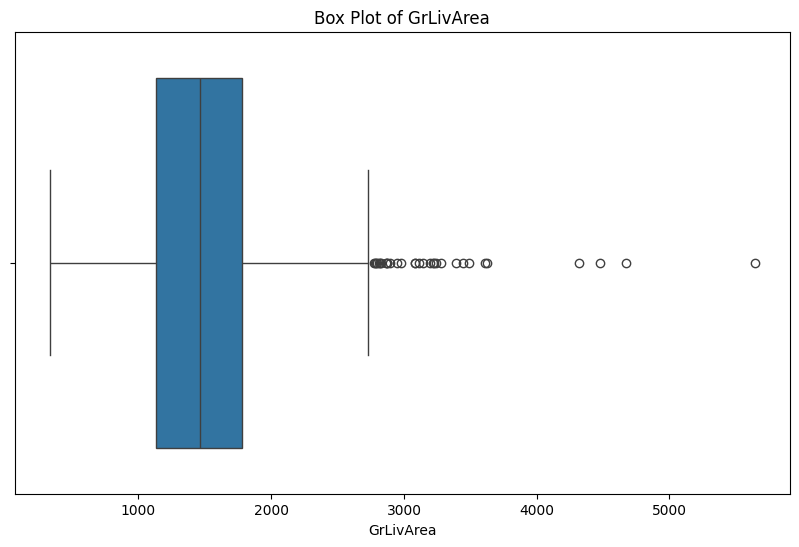

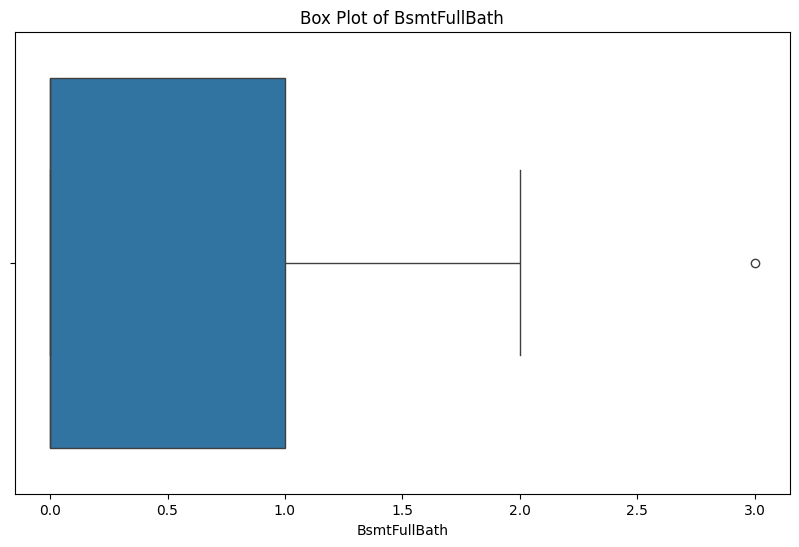

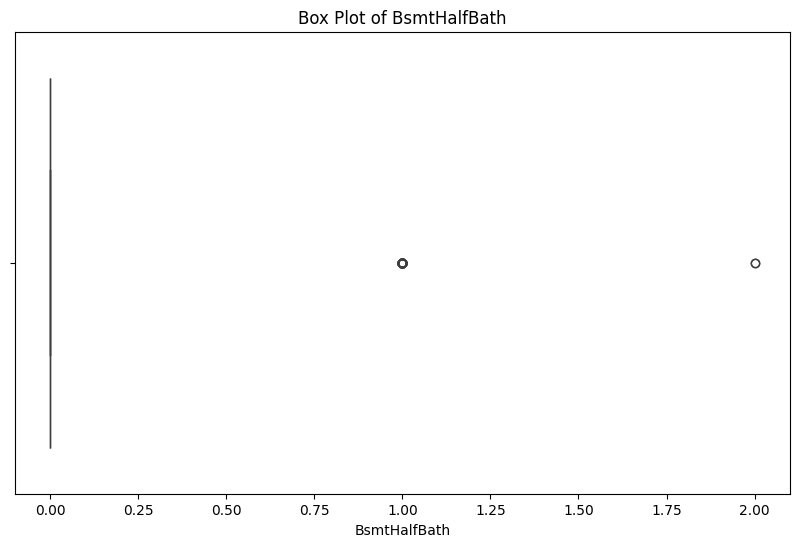

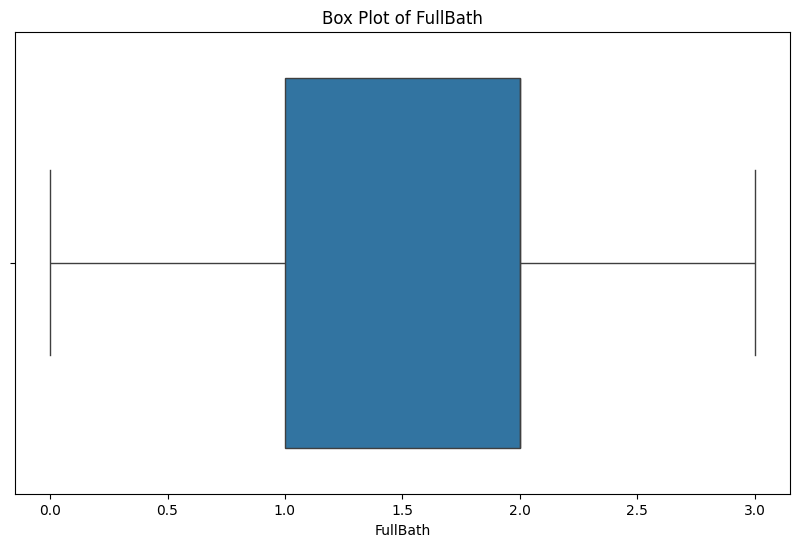

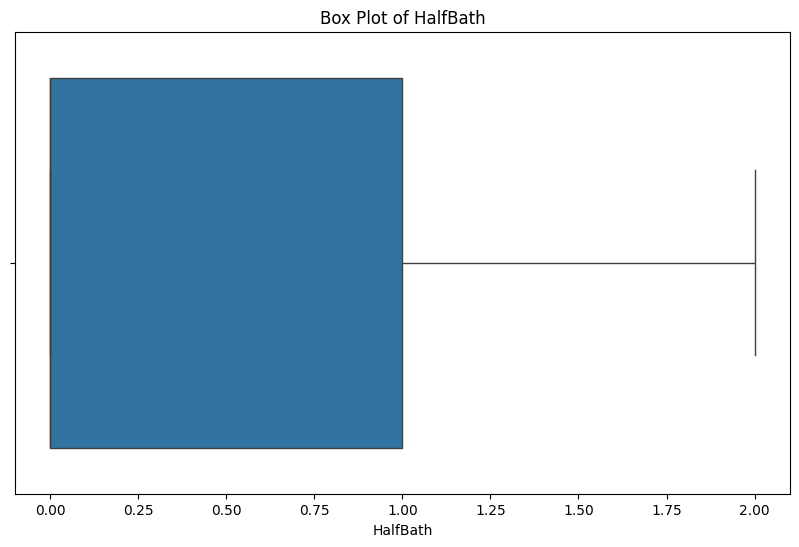

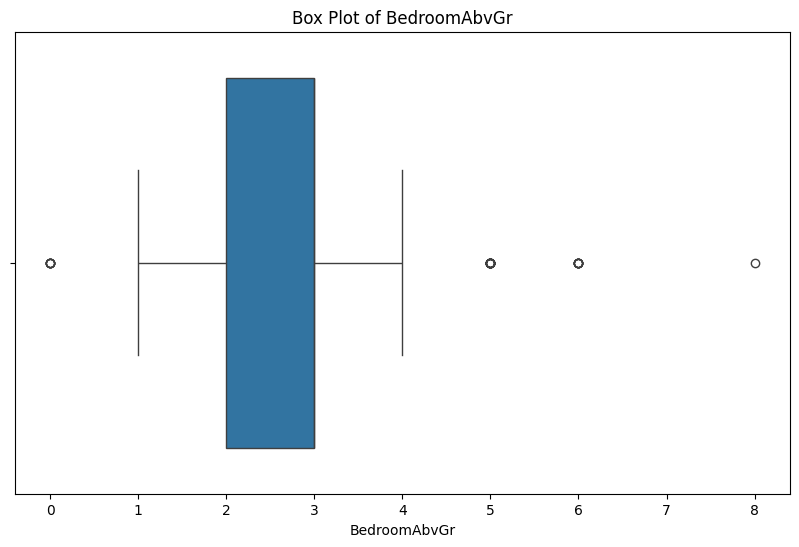

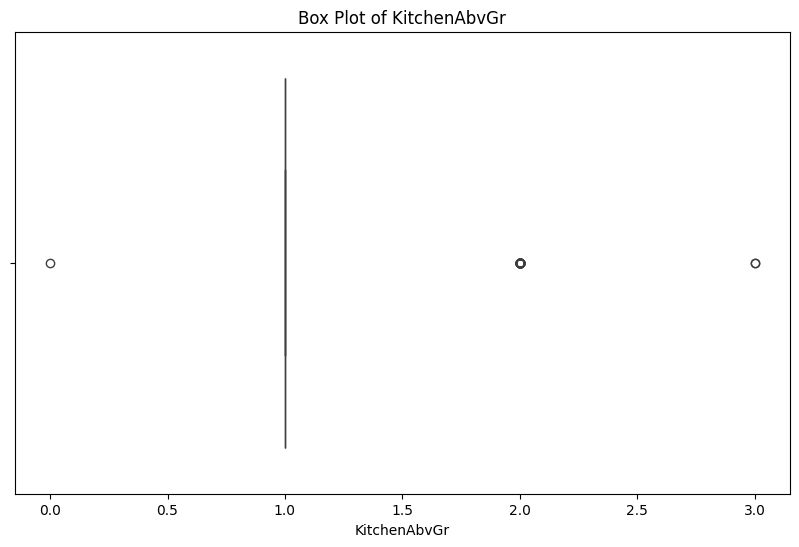

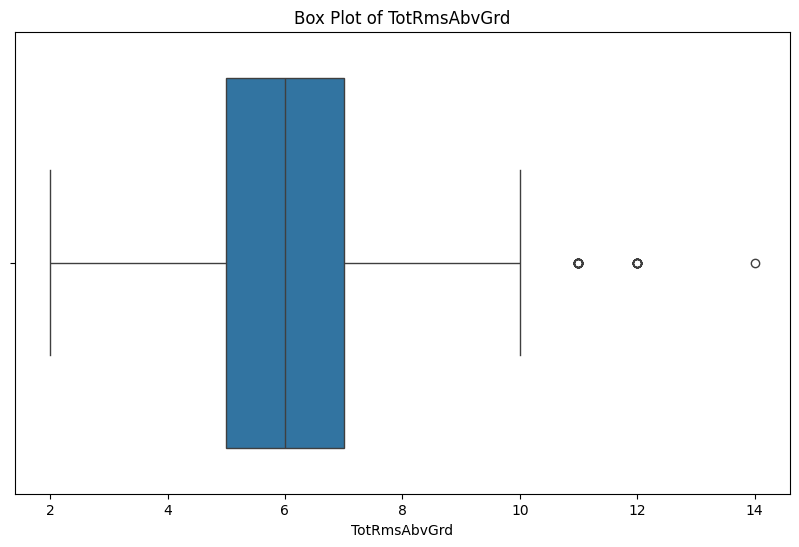

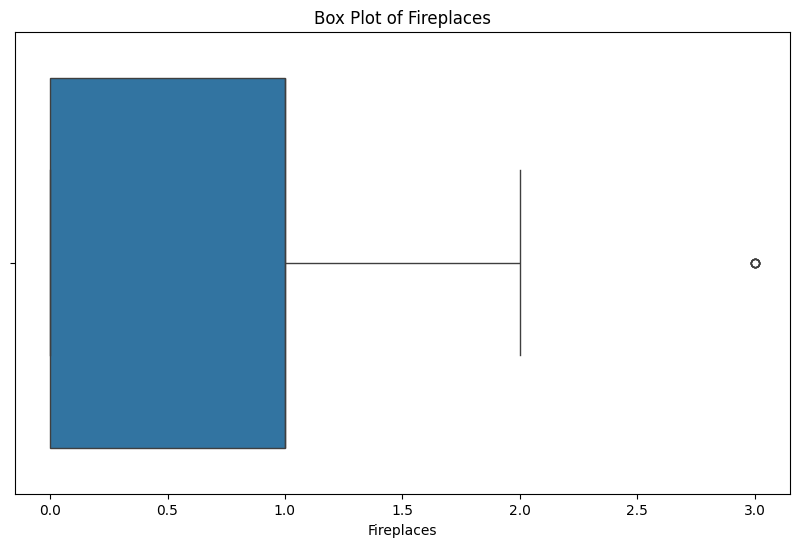

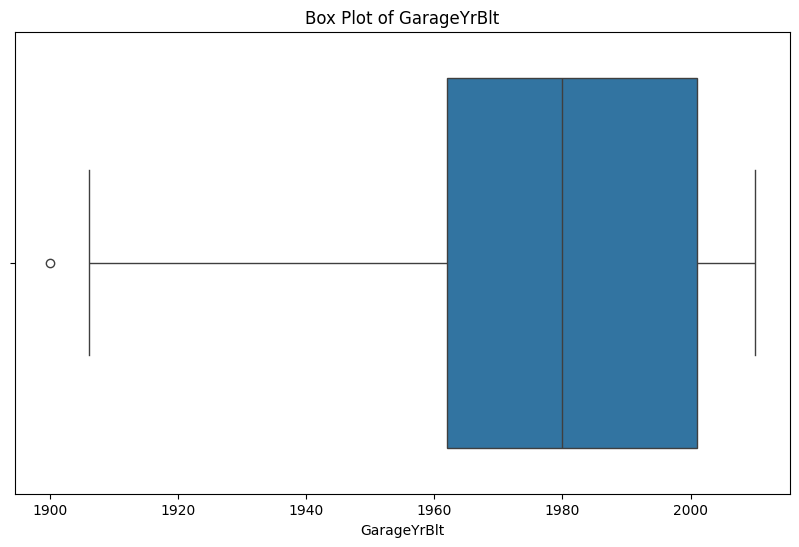

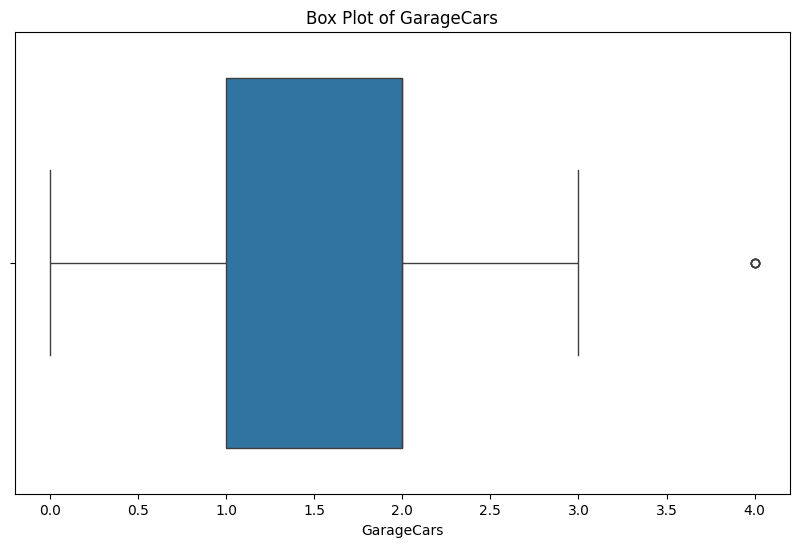

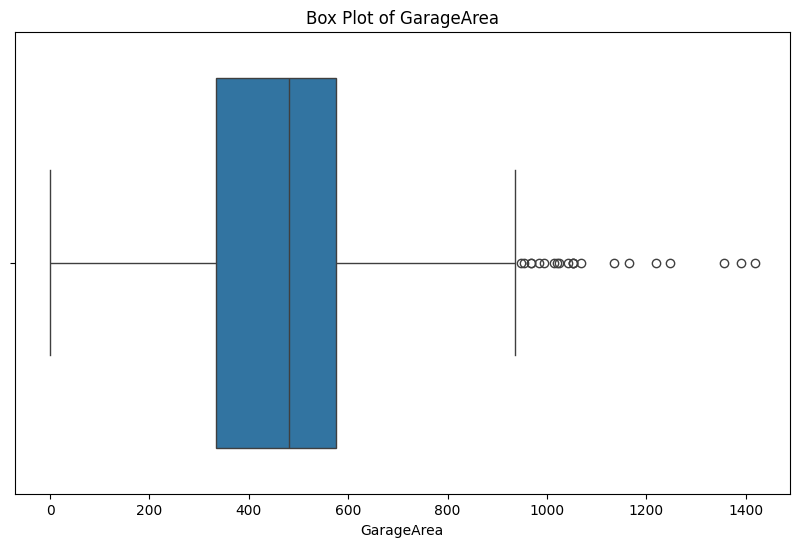

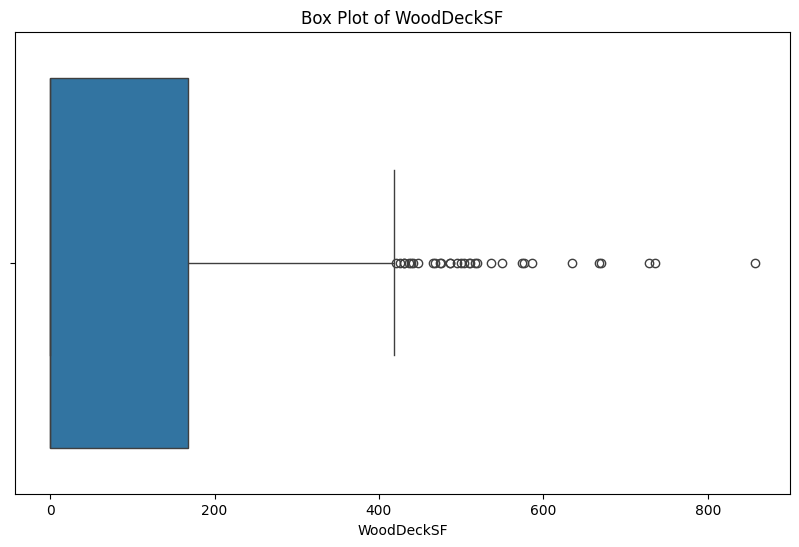

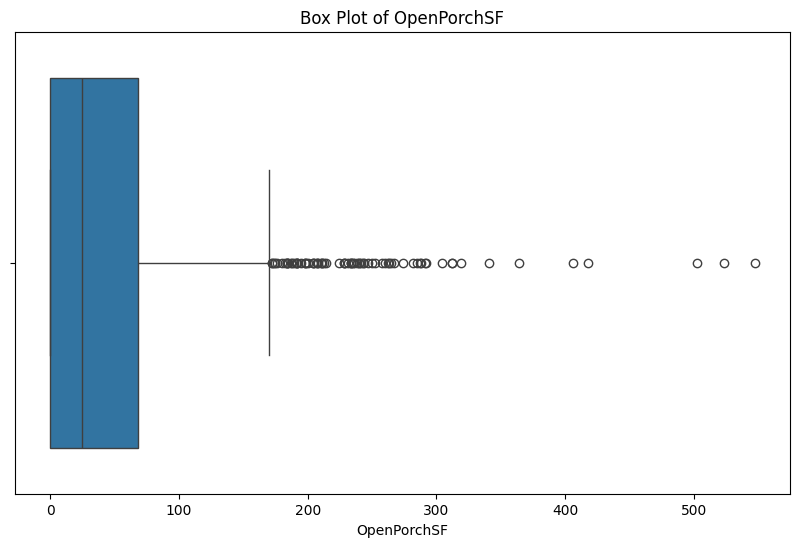

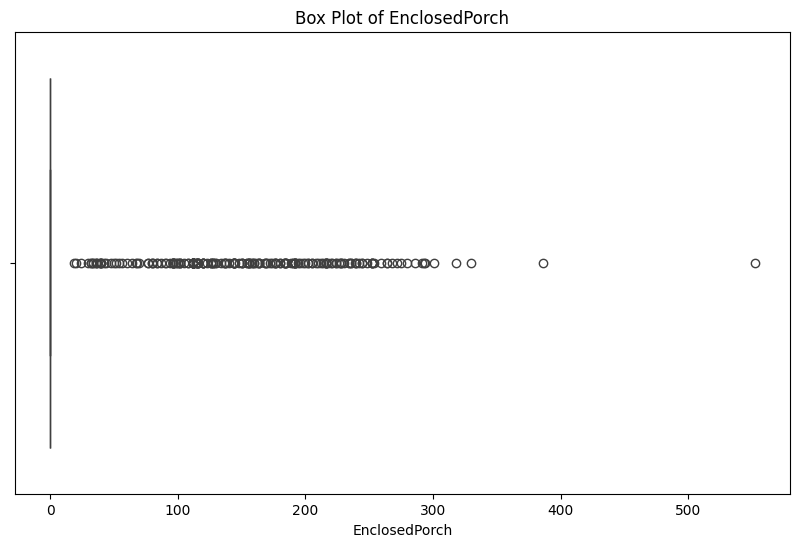

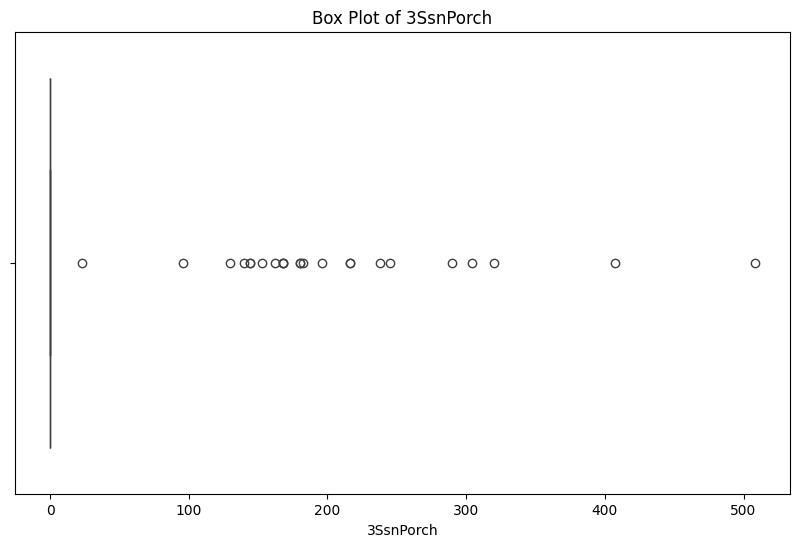

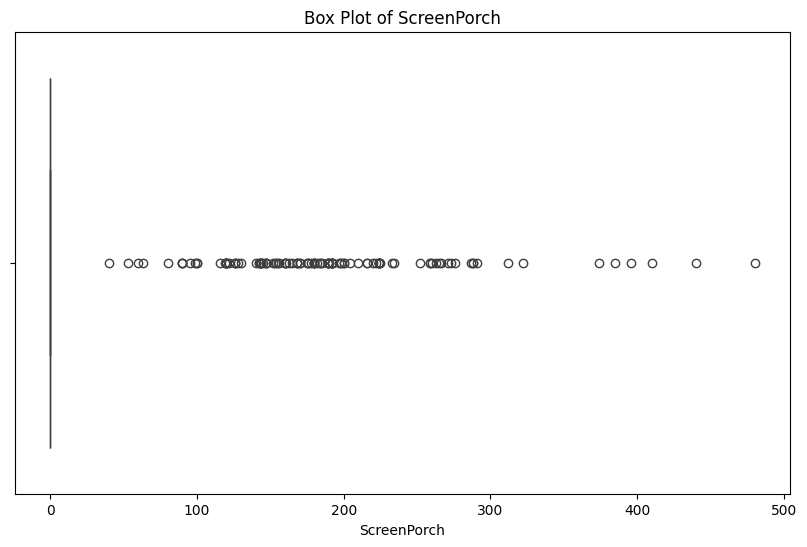

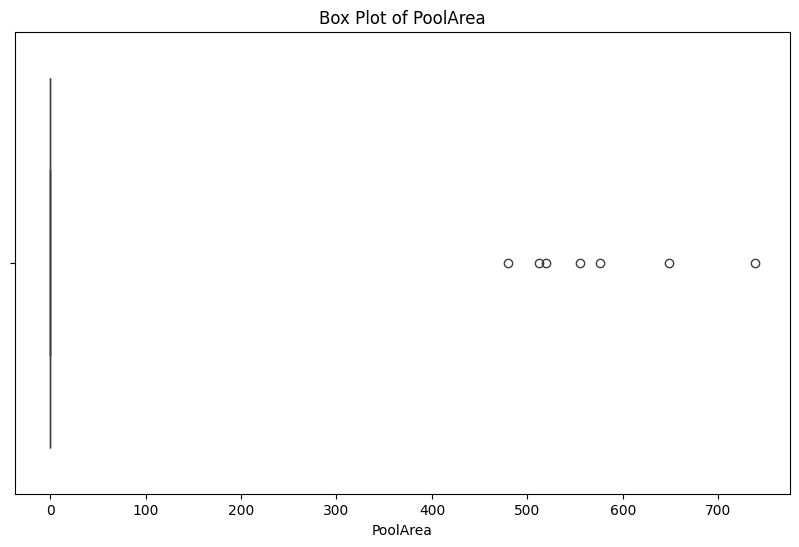

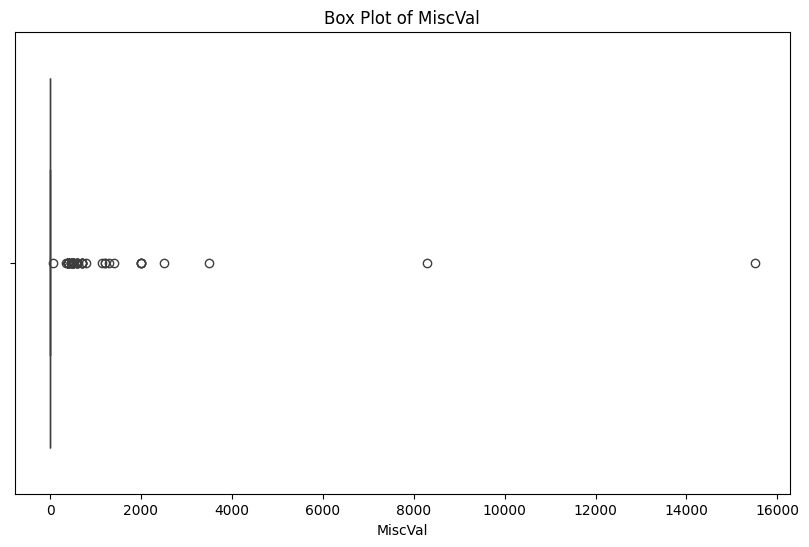

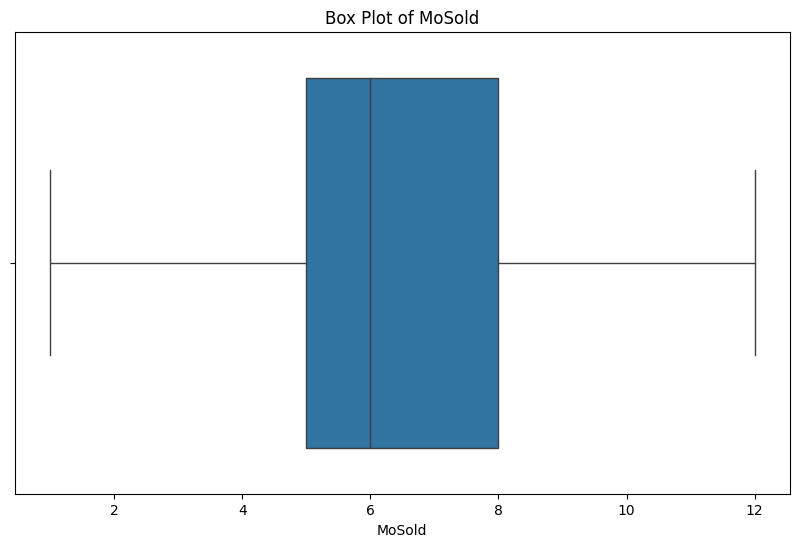

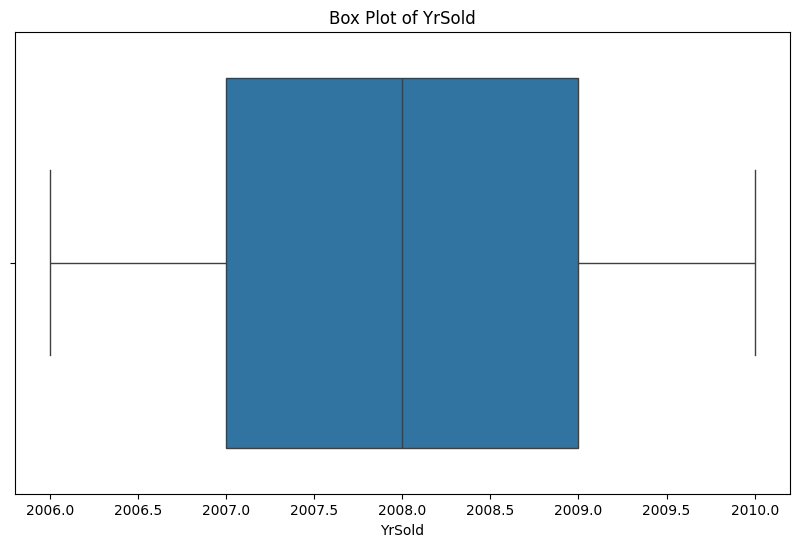

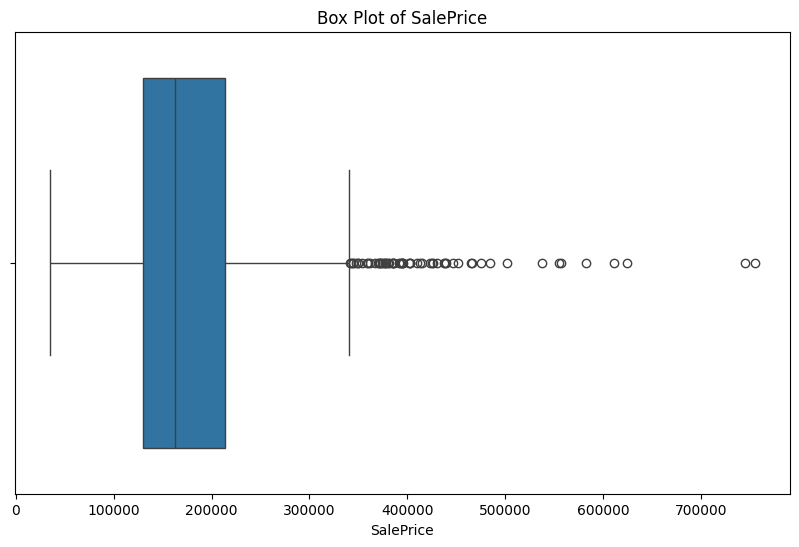

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


pada kasus ini, kita akan memilih untuk menghapus data outlier dengan asumsi bahwa outlier yang terjadi merupakan human error dan tidak ada pengaruh yang besar pada analisis deskriptif. Mari kita mulai pemeriksaan outlier menggunakan metode IQR.

Berikut adalah langkah-langkah umum untuk mendeteksi dan menangani outlier menggunakan metode IQR.

Menghitung IQR, Q1, dan Q3

a. Q1 (Quartile 1): Nilai di persentil ke-25 data.

b. Q3 (Quartile 3): Nilai di persentil ke-75 data.

c. IQR: Rentang antara Q3 dan Q1 (IQR = Q3 - Q1).

Menentukan Batas Bawah dan Batas Atas

a. Batas Bawah: Q1 - 1.5 * IQR

b. Batas Atas: Q3 + 1.5 * IQR

Langkah di atas merupakan algoritma secara umum sehingga untuk memproses metode tersebut, Anda perlu mengonversi langkah-langkah yang ada pada bahasa pemrograman yang digunakan (pada kasus ini Python).

In [ ]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = train[numeric_features].quantile(0.25)
Q3 = train[numeric_features].quantile(0.75)
IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR

In [ ]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((train[numeric_features] < (Q1 - 1.5 * IQR)) | (train[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
train_filtered_numeric = train.loc[condition, numeric_features]

#Mengabungkan kembali dengan kolom  kategorikal
categorical_features = train.select_dtypes(include=['object']).columns
train = pd.concat([train_filtered_numeric, train.loc[condition, categorical_features]], axis=1)

Terakhir,bandingkan data yang telah melewati proses penanganan outliers dan sebelum melewati tahapan tersebut. Berikut adalah salah satu contoh visualisasi data yang telah melewati tahapan penanganan outliers.


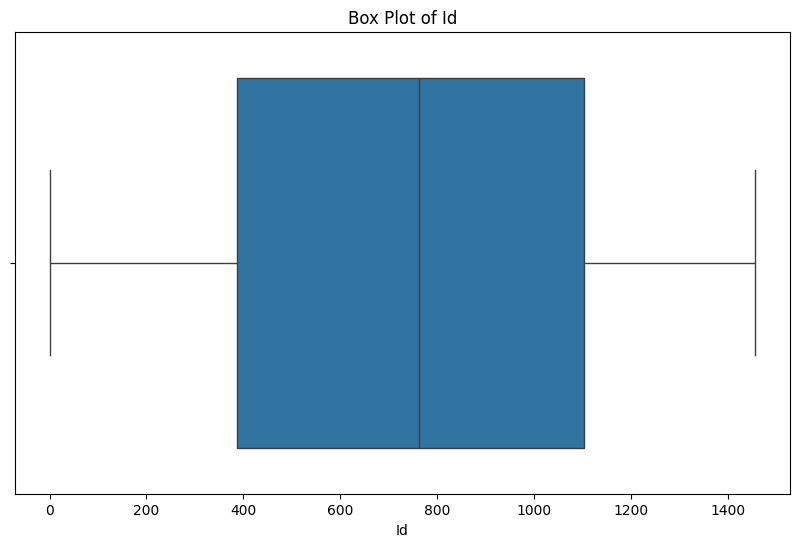

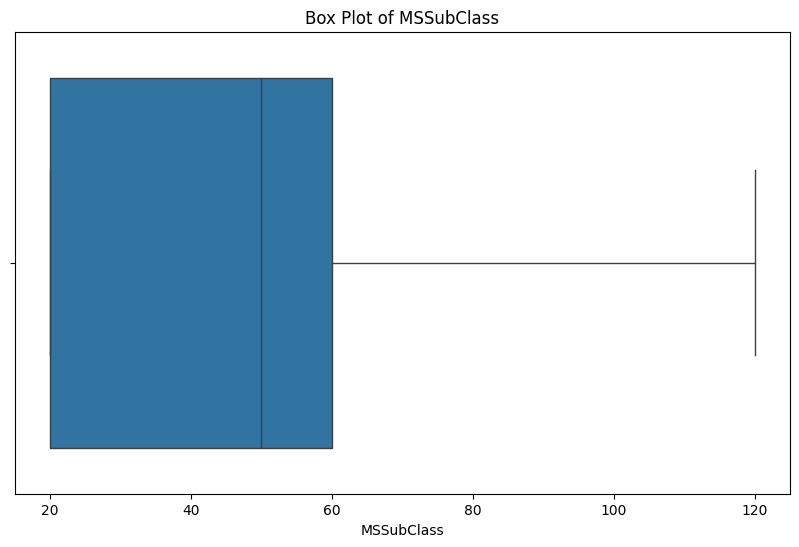

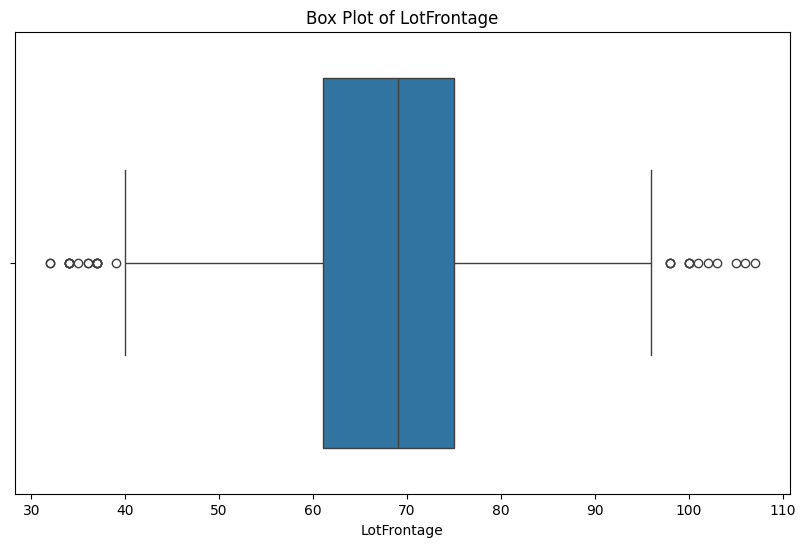

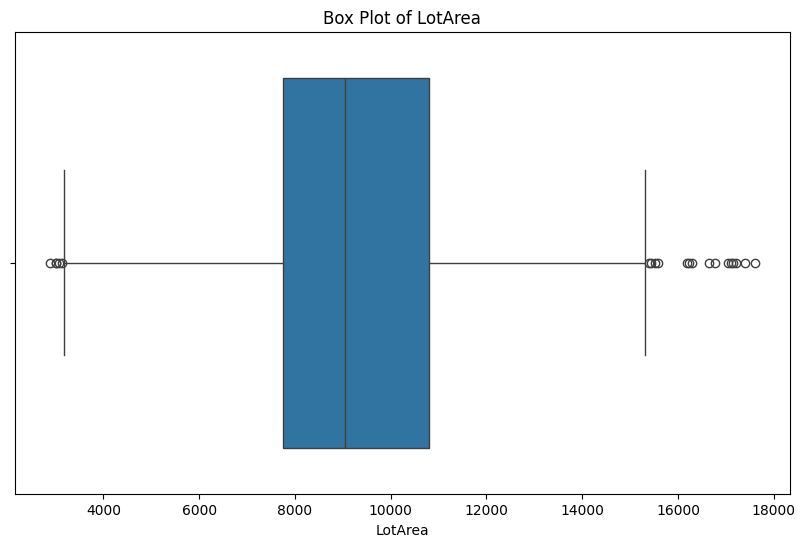

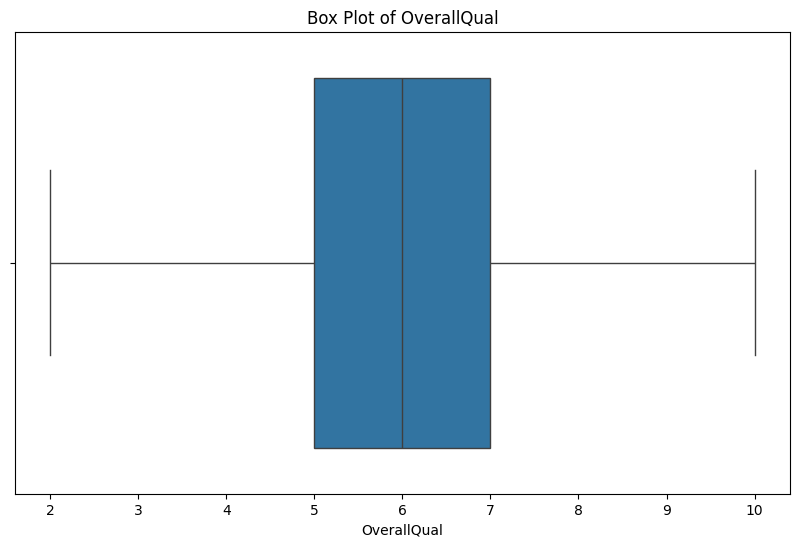

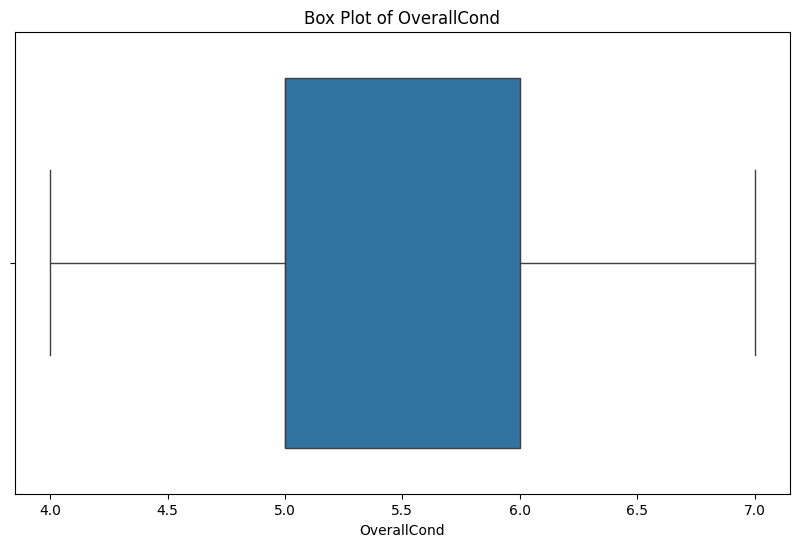

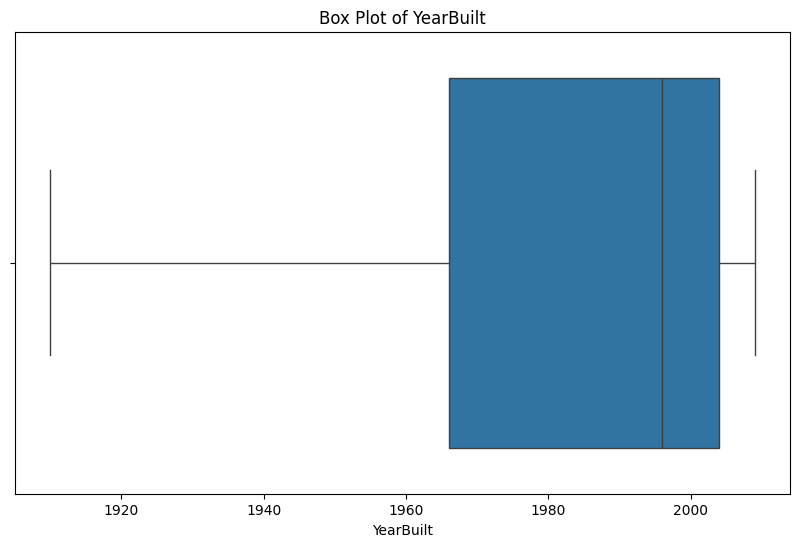

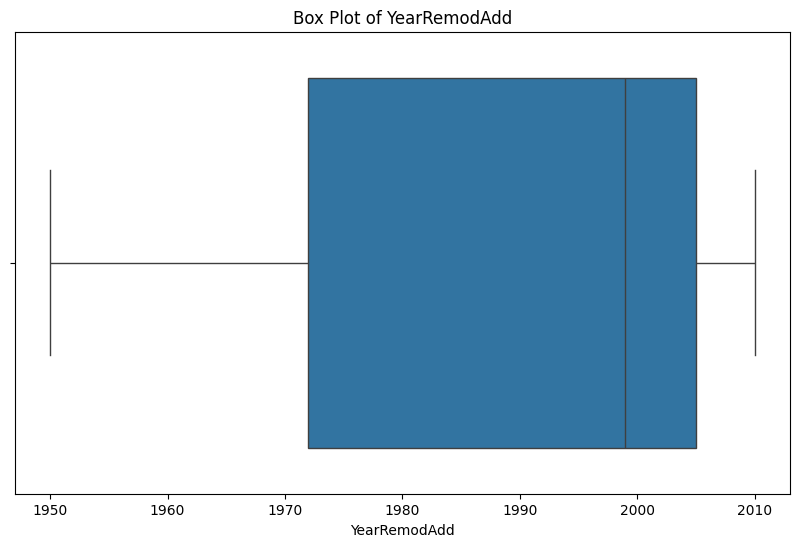

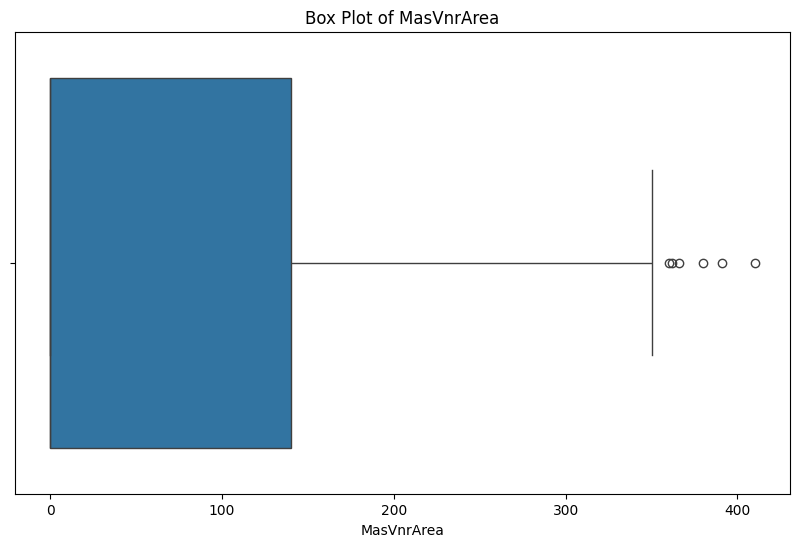

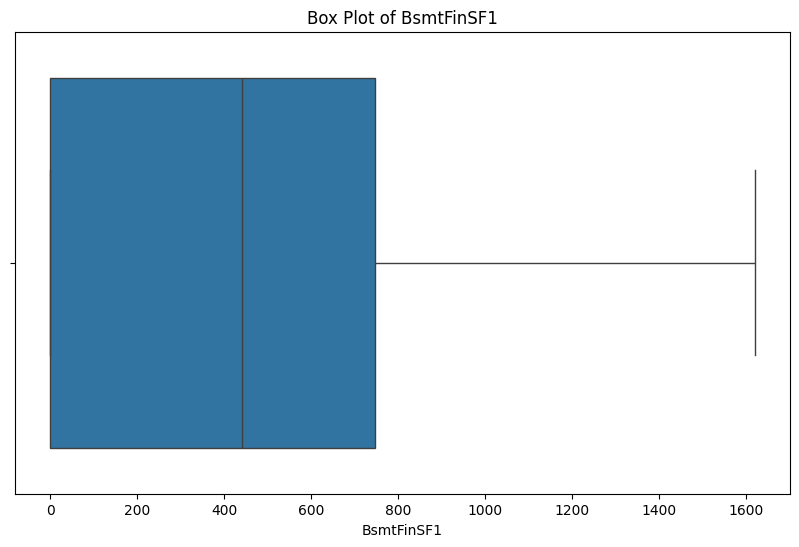

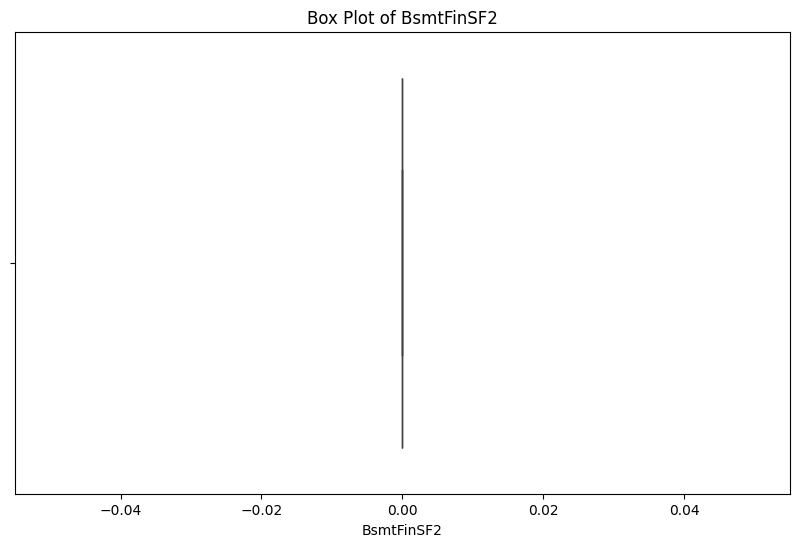

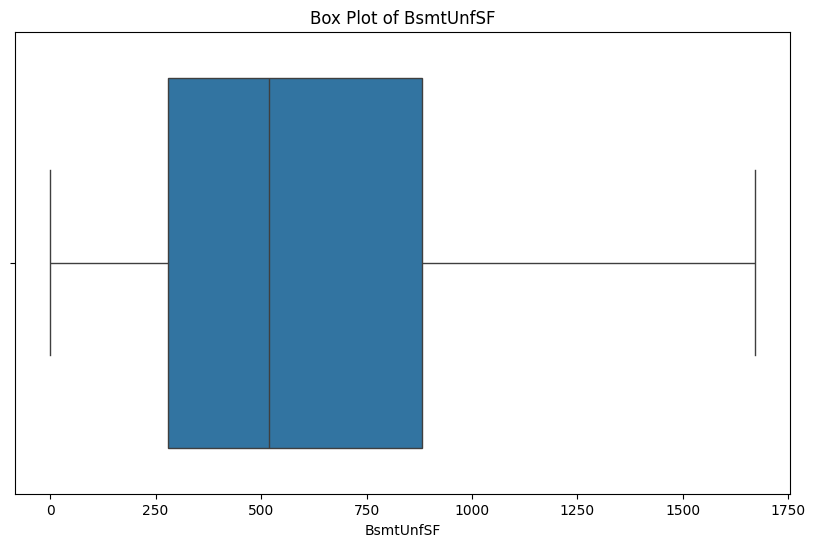

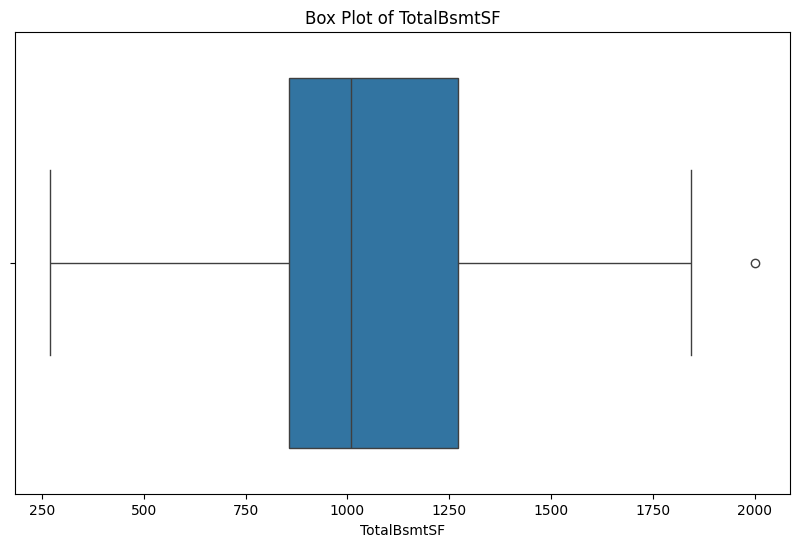

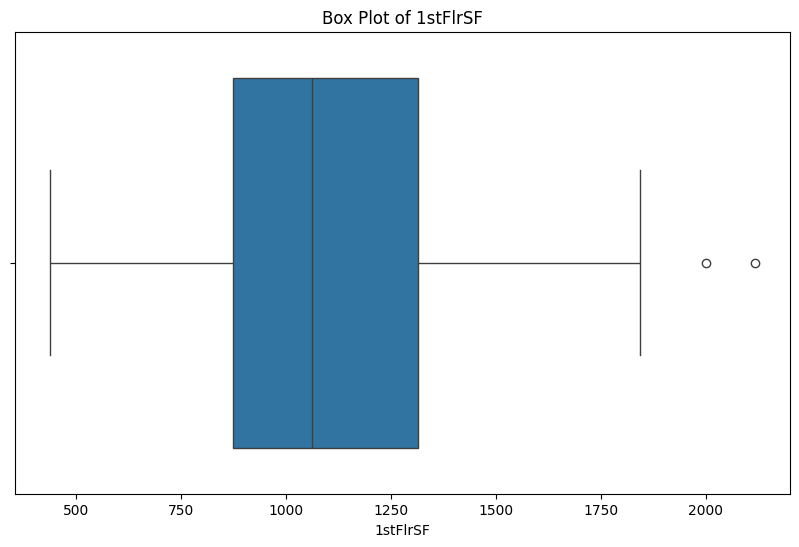

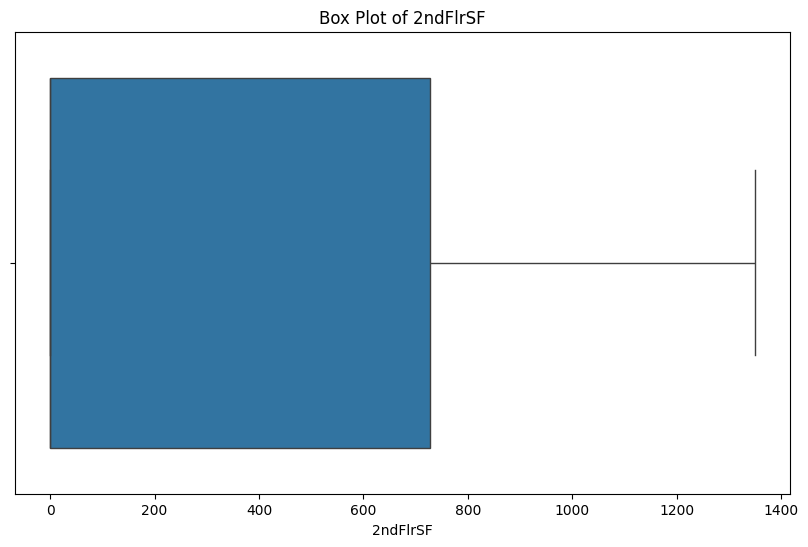

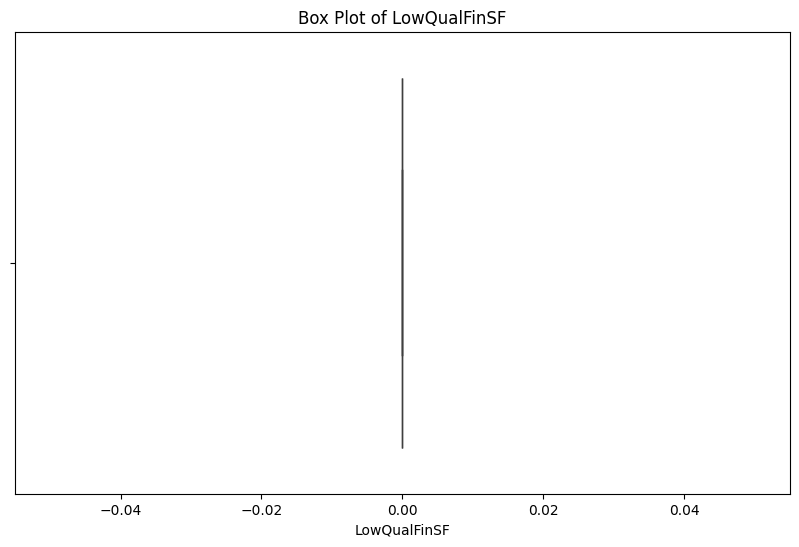

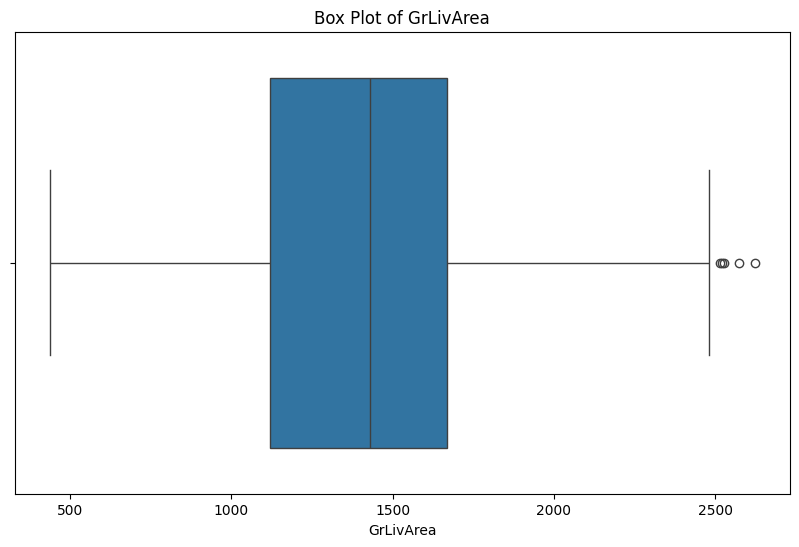

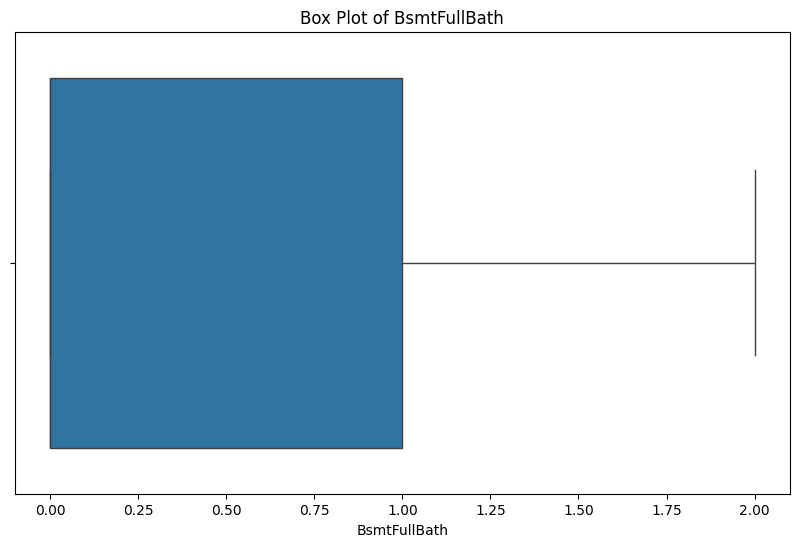

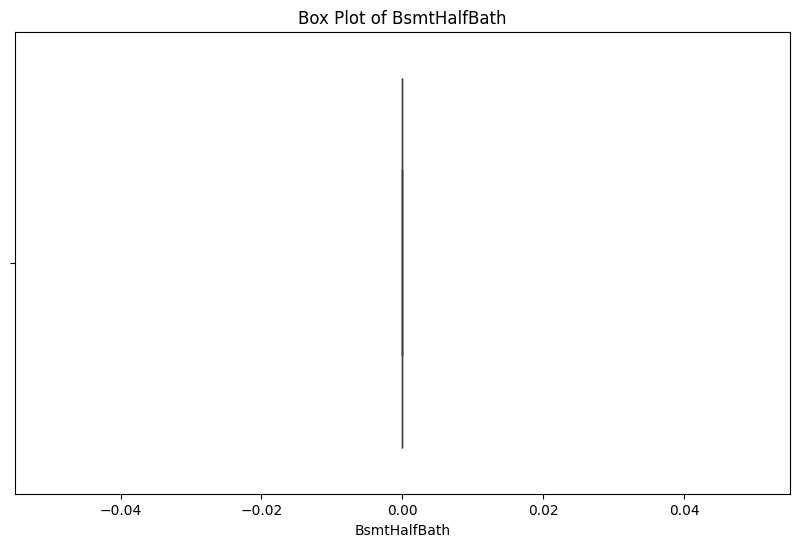

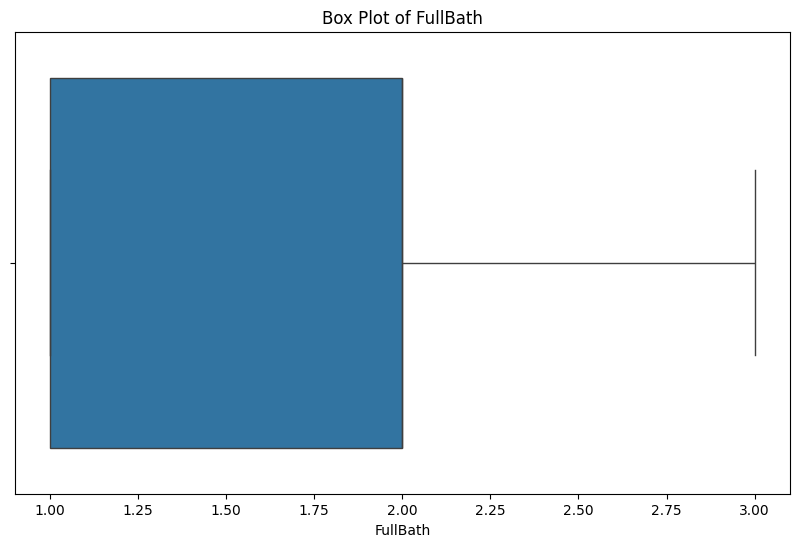

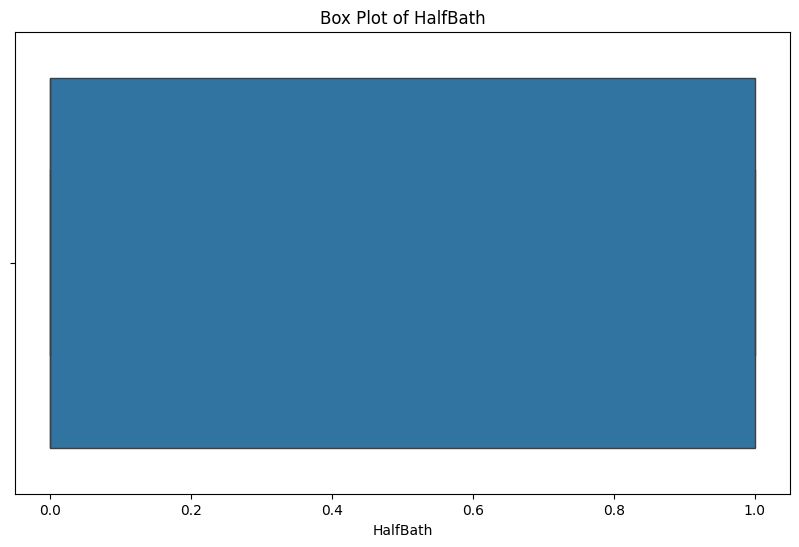

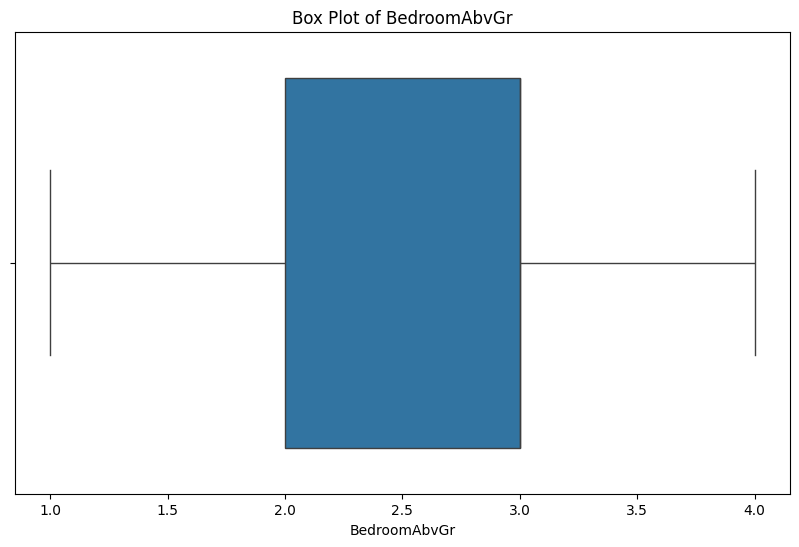

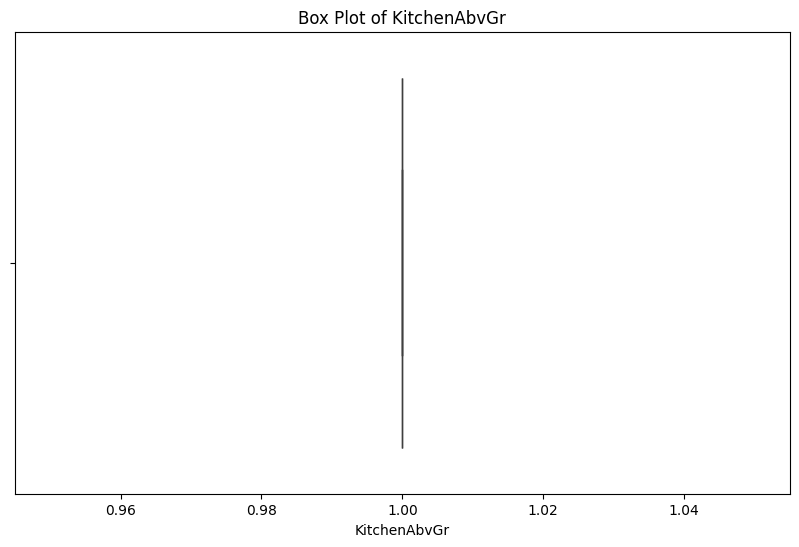

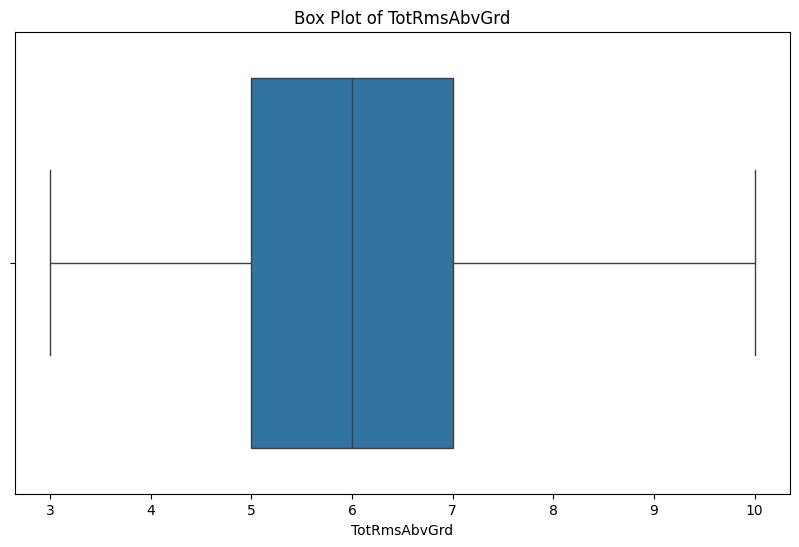

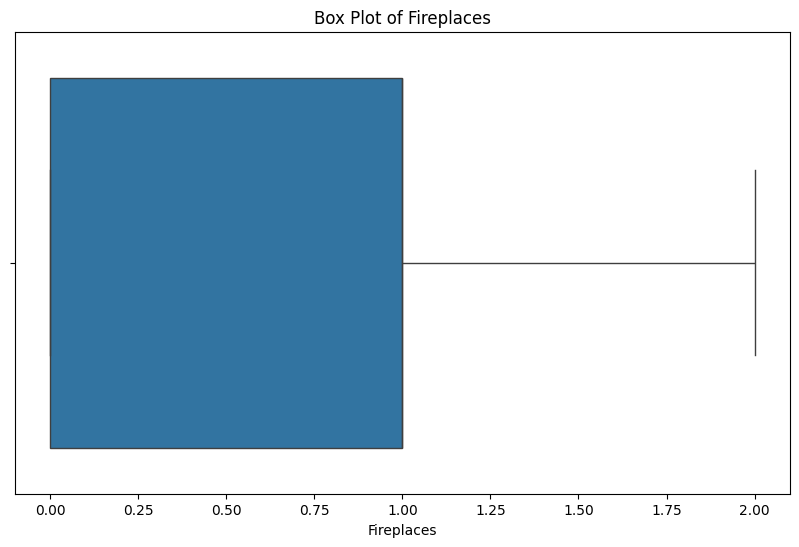

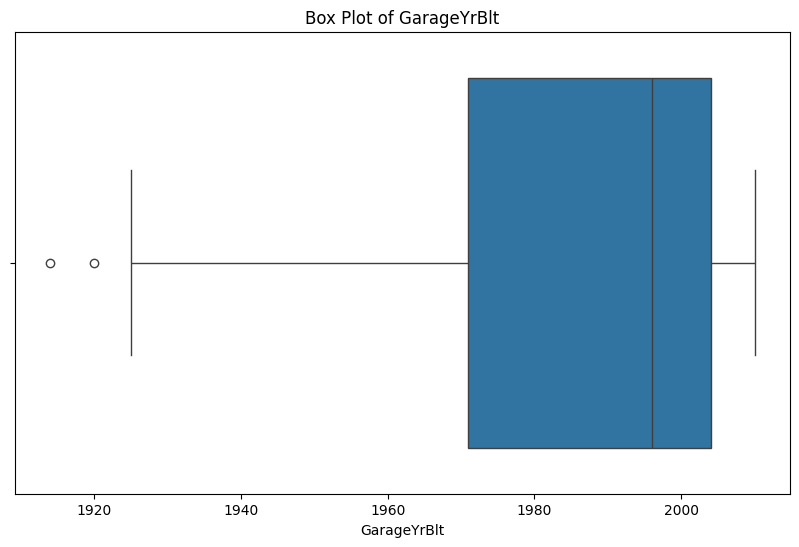

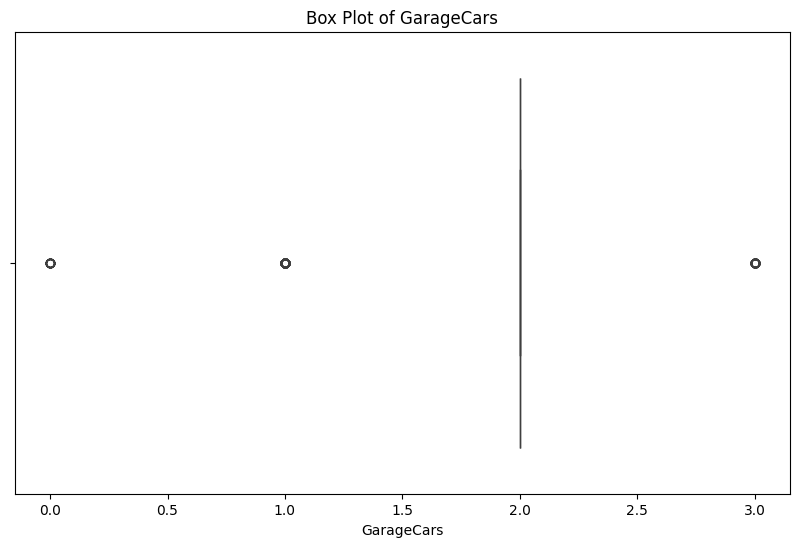

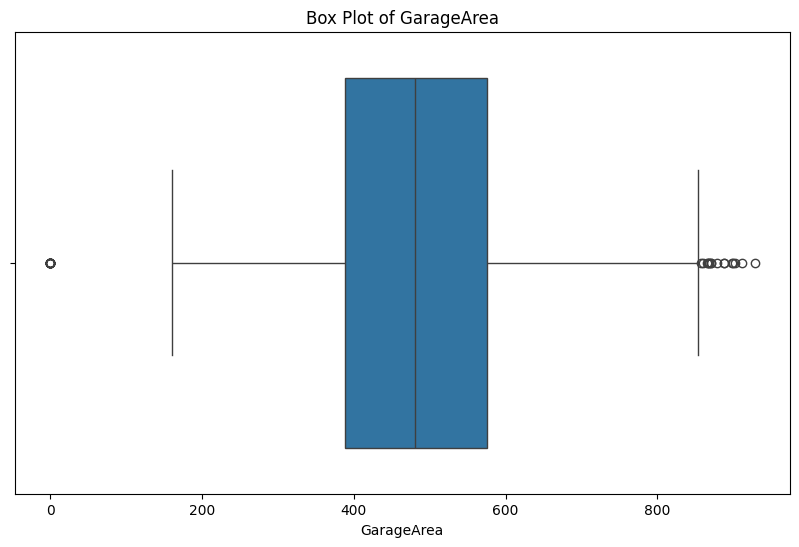

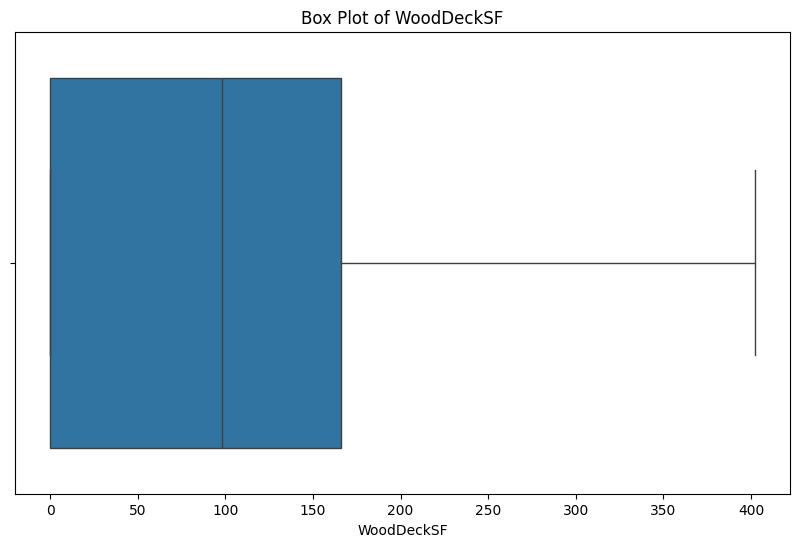

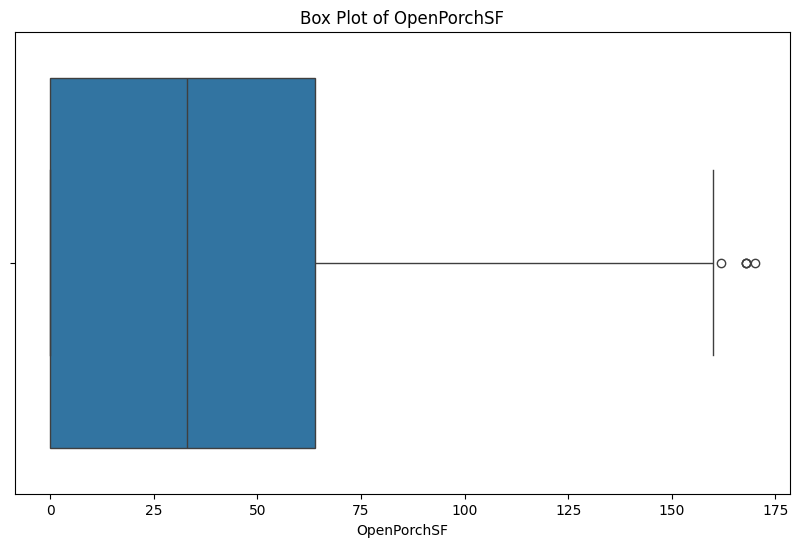

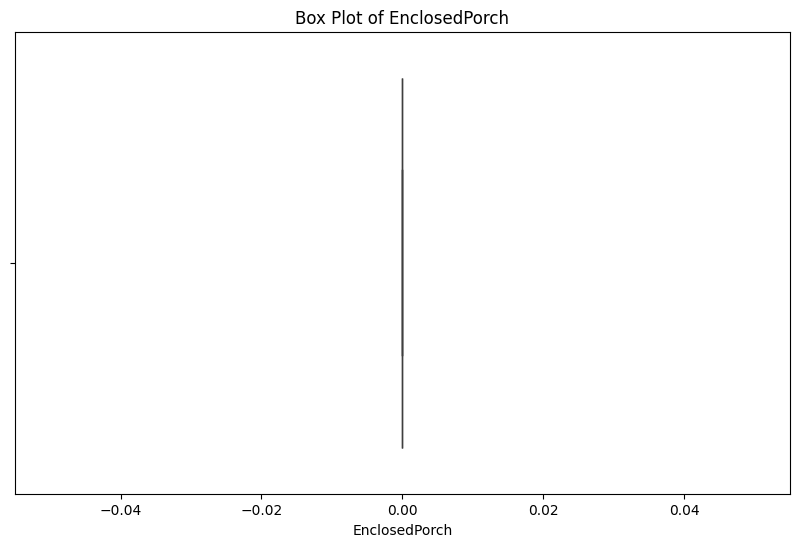

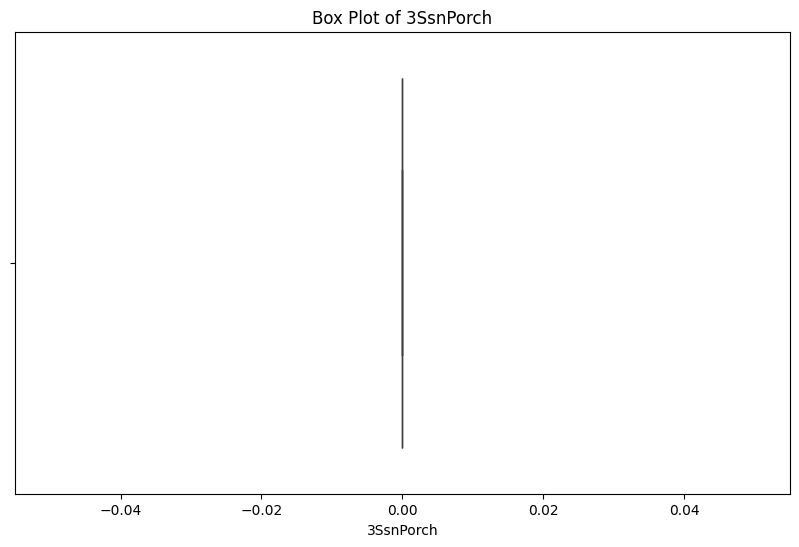

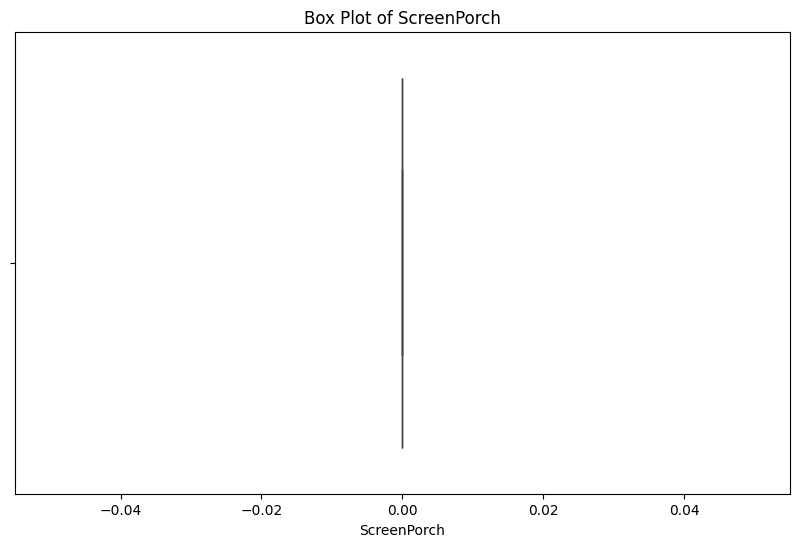

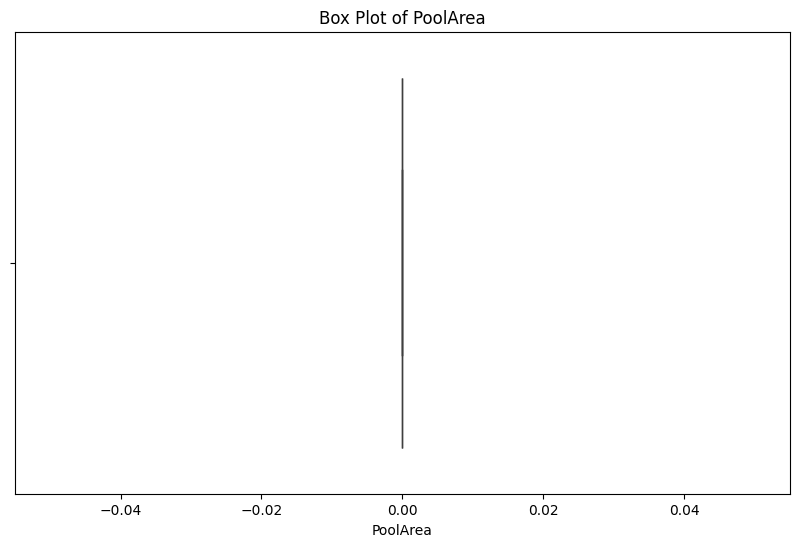

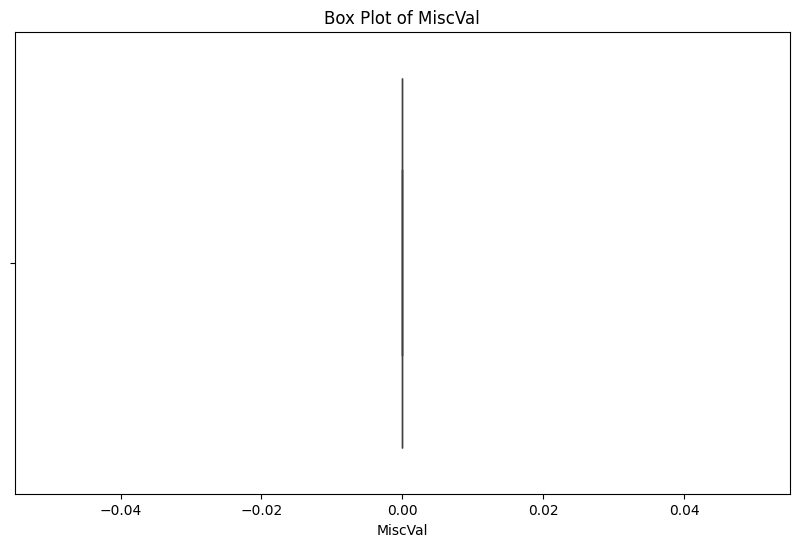

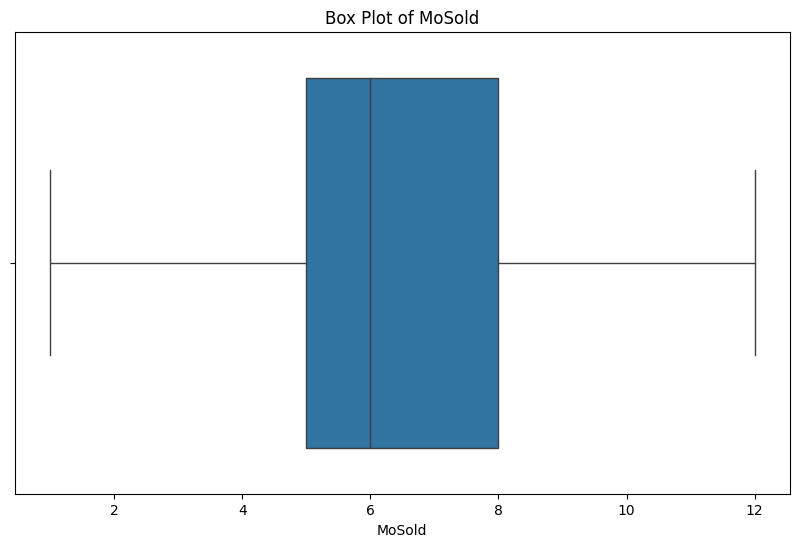

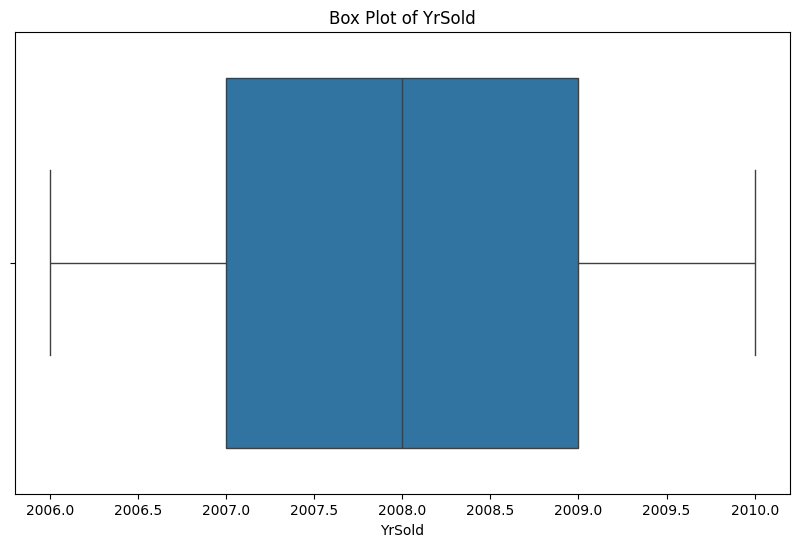

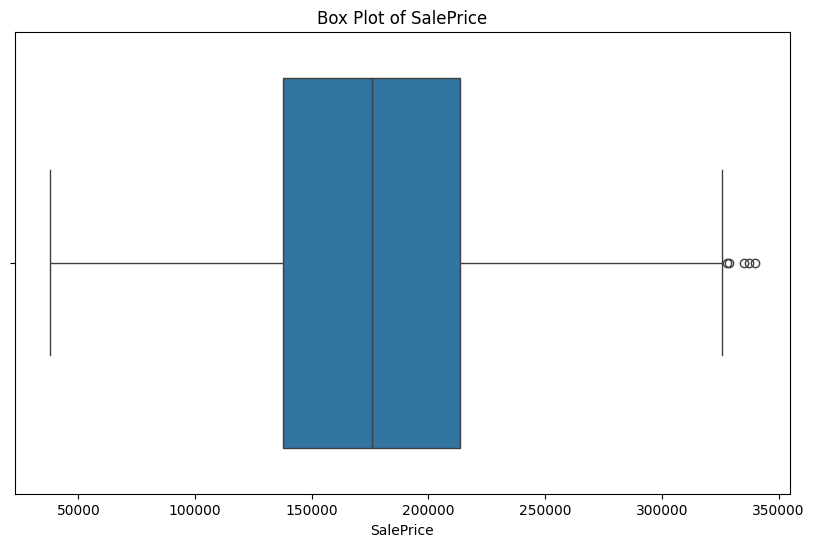

In [ ]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

# **Normalisasi dan Standardisasi Data**

Jika kita tarik benang merah perbedaan dari standardisasi dengan normalisasi hanya pada rentangnya.

**Normalisasi:** mengubah data ke dalam rentang [0, 1]. Ideal untuk model berbasis jarak dan data yang tidak terdistribusi normal.

**Standardisasi:** mengubah data sehingga rata-rata menjadi atau mendekati 0 dan standar deviasi menjadi 1. Hal ini membantu model yang memerlukan distribusi normal atau data dengan skala berbeda menjadi lebih ideal pada proses pelatihannya.

kembali ke studi kasus yang sedang kita hadapi. Kita akan melakukan standardisasi karena membutuhkan distribusi normal dan tidak membutuhkan skala 0-1. Perhatikan kode berikut.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standarisasi fitur numerik
scaler = StandardScaler()
train[numeric_features] = scaler.fit_transform(train[numeric_features])

lakukan perbandingan antara data sebelum dan sesudah dilakukan standardisasi, Anda dapat menggunakan kode berikut.

Text(0.5, 1.0, 'Histogram Sebelum Standardisasi')

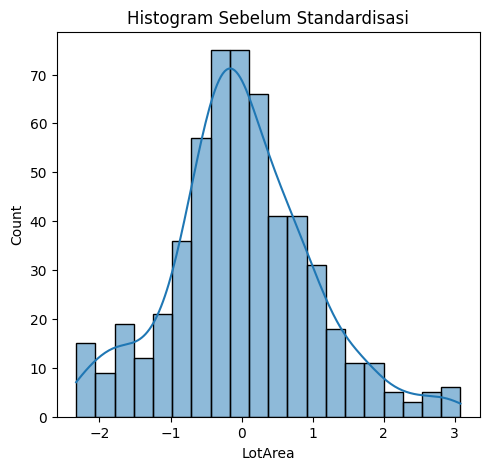

In [ ]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

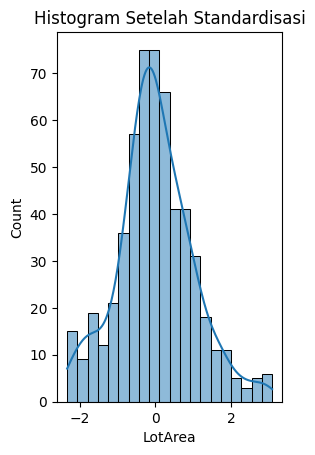

In [ ]:
# Histogram Setelah Standardisasi
plt.subplot(1, 2, 2)
sns.histplot(train[numeric_features[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")

melakukan pemeriksaan kepada data yang sudah melewati tahapan-tahapan sebelumnya. Proses tersebut dapat Anda lakukan dengan menggunakan kode berikut.

In [ ]:
# Mengidentifikasi baris duplikat
duplicates = train.duplicated()

print("Baris Duplikat")
print(train[duplicates])

Baris Duplikat
Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition]
Index: []

[0 rows x 81

In [ ]:
# Menghapus baris duplikat
# train = train.drop_duplicates()

# print("DataFrame setelah menghapus duplikat:")
# print(train)

In [ ]:
category_features = train.select_dtypes(include=['object']).columns
train[category_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
10,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,Detchd,Unf,Fa,TA,Y,NaN,GdWo,NaN,WD,Normal
1451,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial
1453,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1454,FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Kita akan menggunakan metode one hot encoding dan label encoding karena data kategorikal yang ada pada dataset ini tidak memiliki urutan.

**One Hot Encoding**

Penggunaan one hot encoding sangatlah mudah terutama ketika Anda telah memisahkan nama kolom untuk data kategorikal. Perhatikan kode berikut.

In [ ]:
train_one_hot = pd.get_dummies(train, columns=category_features)
train_one_hot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,False,False,False,False,True,False,False,False,True,False
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,False,False,False,False,True,False,False,False,True,False
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,False,False,False,False,True,False,False,False,True,False
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,False,False,False,False,True,False,False,False,True,False
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,False,False,False,False,True,False,False,False,True,False
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,False,False,True,False,False,False,False,False,False,True
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,False,False,False,False,True,True,False,False,False,False
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import LabelEncoder


#Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(train)

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(train[col])

# Menampilkan Hasil
df_lencoder

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,0,1,2,3,2,0,4,1,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,0,1,2,3,2,0,4,1,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,0,1,2,3,2,0,4,1,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,0,1,2,3,2,0,4,1,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,2,2,3,2,0,4,1,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,3,2,0,3,2,0,1,1,8,3
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,0,0,2,3,2,0,4,1,6,4
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,0,2,2,3,2,0,4,1,8,0
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,0,1,2,3,2,0,4,1,8,3


Sampai di sini, mari kita bahas bersama terkait kedua pendekatan tersebut. One hot encoding dan label encoding adalah dua teknik yang sering digunakan untuk mengubah data kategorikal menjadi format numerik yang dapat digunakan dalam algoritma machine learning. Keduanya memiliki kelebihan dan kekurangan tergantung pada konteks penggunaannya

In [ ]:
df_lencoder. head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,0,1,2,3,2,0,4,1,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,0,1,2,3,2,0,4,1,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,0,1,2,3,2,0,4,1,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,0,1,2,3,2,0,4,1,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,2,2,3,2,0,4,1,8,3


In [ ]:
# Menghitung jumlah dan persentase missing values di setiap kolom
missing_values = df_lencoder.isnull().sum()
missing_percetage = (missing_values / len(df_lencoder)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percetage}).sort_values(by = 'Missing Values', ascending = False)

missing_data[missing_data['Missing Values'] > 0] # Menampilkan kolom dengan missing values

,Missing Values,Percentage


Selanjutnya, lakukan analisis deskriptif menggunakan **.describe()** atau membuat histogram agar distribusi data lebih terlihat. Karena kita telah mempelajari fungsi **.describe()**

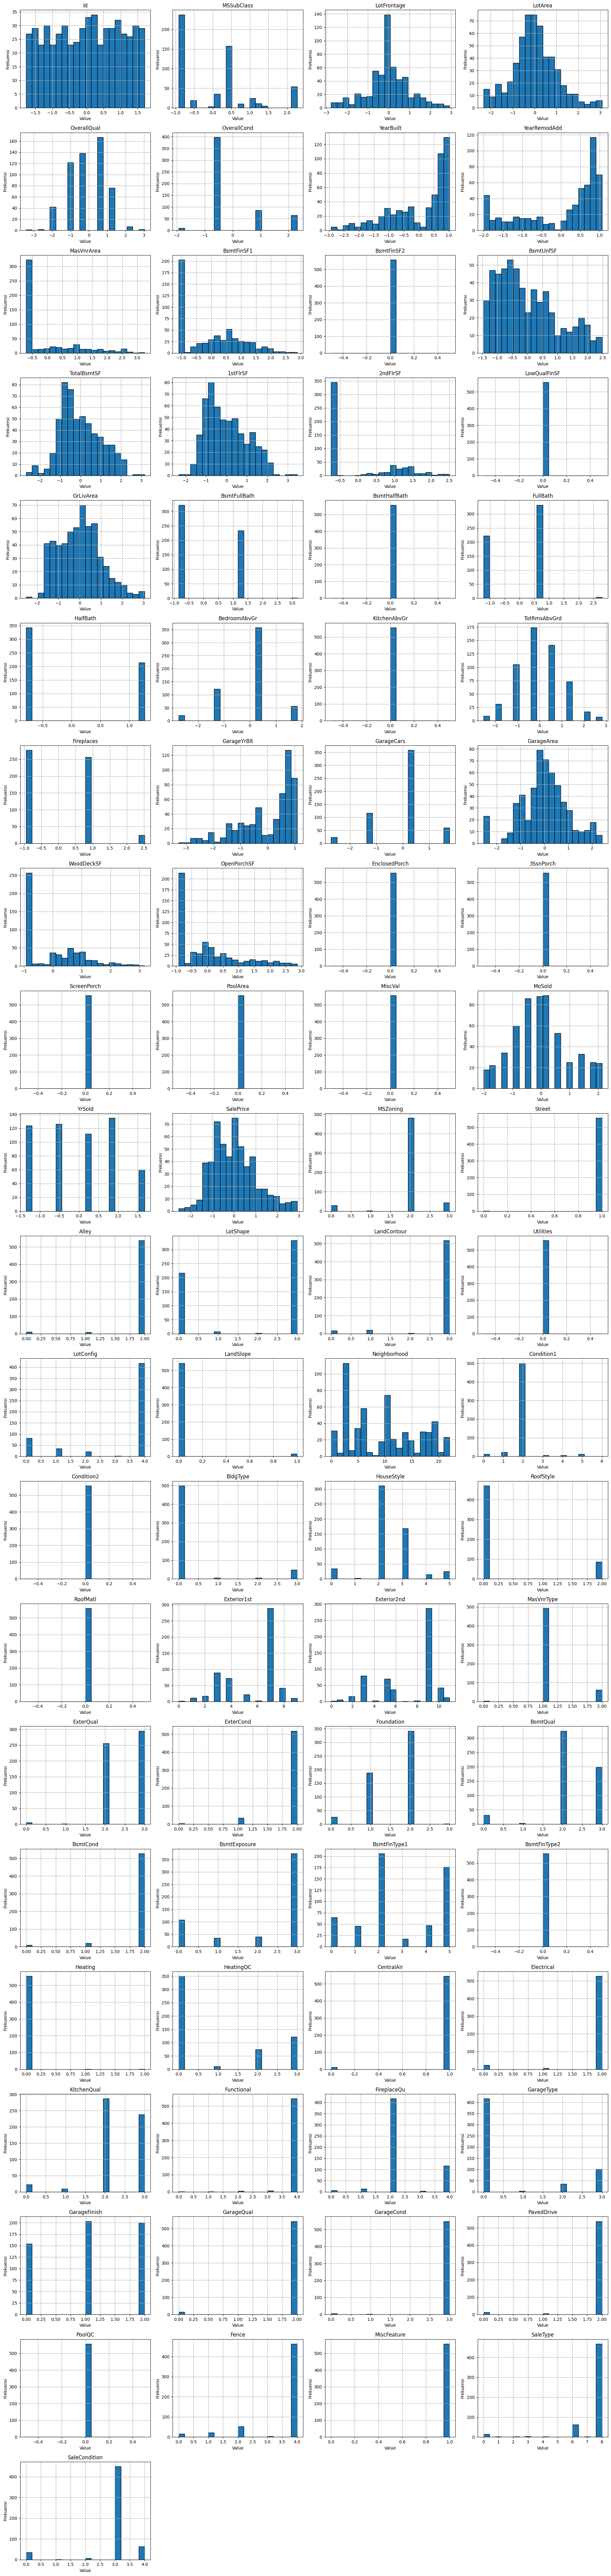

In [ ]:
# Menghitung Jumlah Variable
num_vars = df_lencoder.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4 # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris


# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frekuensi')

# Menghapus subplot yang tidak digunakan (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()

# Menampilkan plot
plt.show()

pada seluruh output yang dihasilkan menunjukkan bahwa semua kolom sudah dinormalisasi atau distandardisasi. Hal tersebut ditunjukkan dari nilai rata-rata (mean) untuk hampir semua kolom adalah mendekati 0, dan standar deviasi (std) sekitar 1. Hal ini menunjukkan bahwa data telah diproses sehingga setiap fitur memiliki skala yang serupa untuk membantu proses analisis lebih lanjut.

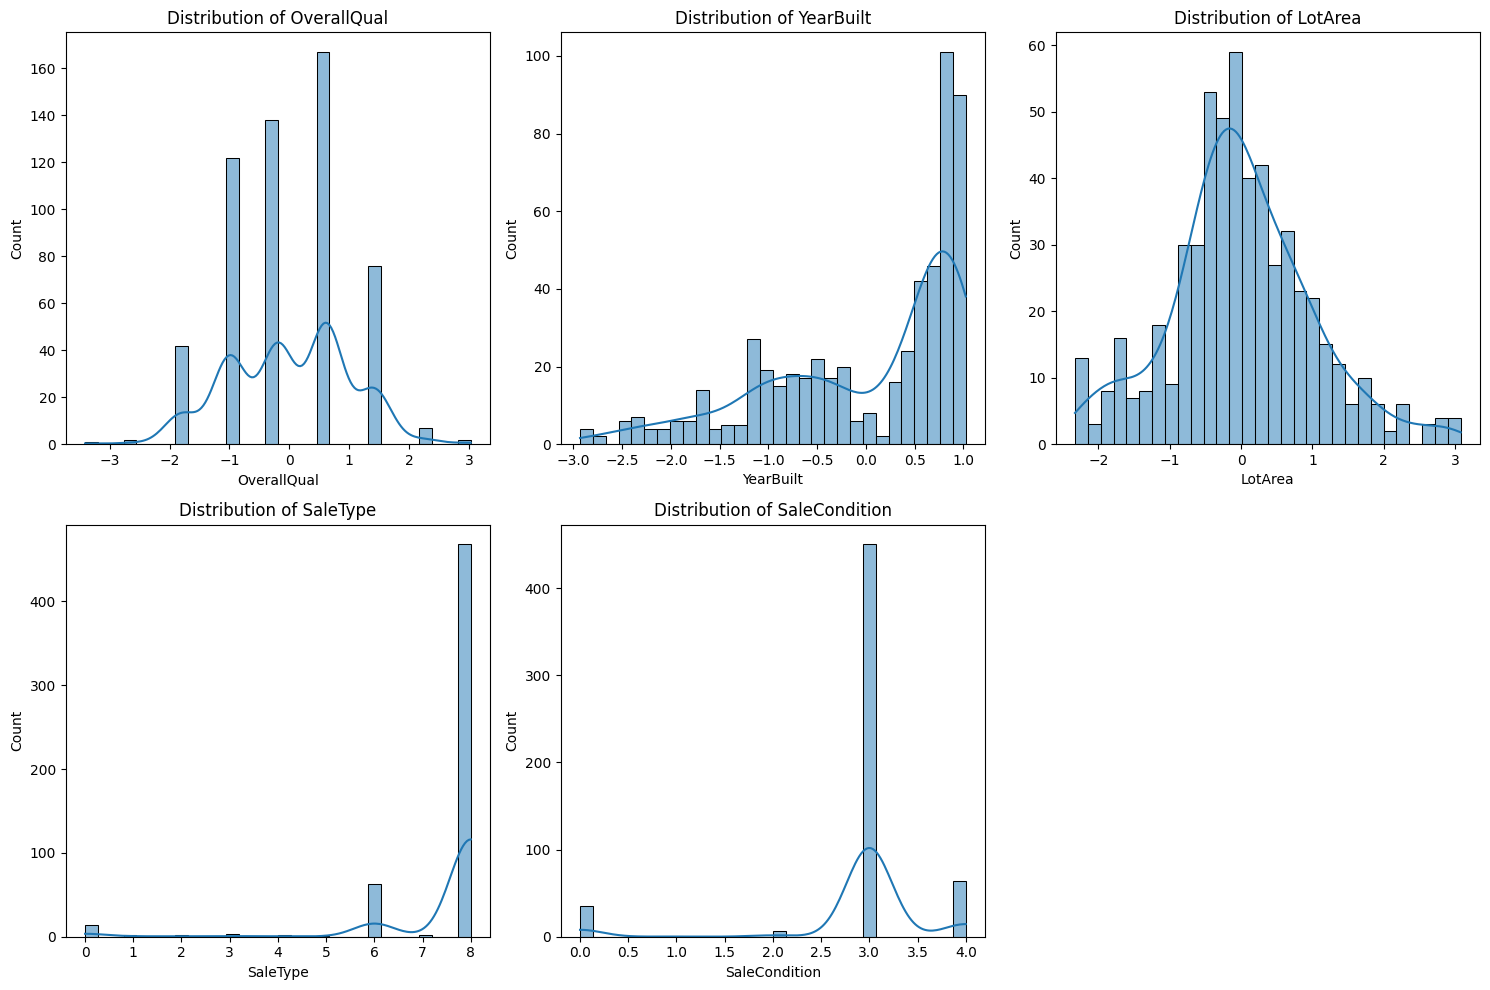

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi data untuk beberapa kolom
colum_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']

plt.figure(figsize=(15, 10))
for i, column in enumerate(colum_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

- **OverallQual:** sebagian besar data terkonsentrasi di sekitar nilai tengah dengan distribusi miring ke kanan.
- **YearBuilt:** distribusi cenderung normal dengan beberapa lonjakan pada tahun tertentu, menunjukkan periode pembangunan rumah yang lebih aktif.
- **LotArea:** distribusinya tidak simetris karena adanya beberapa outlier yang signifikan pada sisi kanan (lot area yang sangat besar).
- **SaleType:** kategori tertentu mendominasi distribusi, menunjukkan preferensi atau pola tertentu dalam tipe penjualan.
- **SaleCondition:** mirip dengan SaleType, beberapa kondisi penjualan lebih umum dibandingkan lainnya.

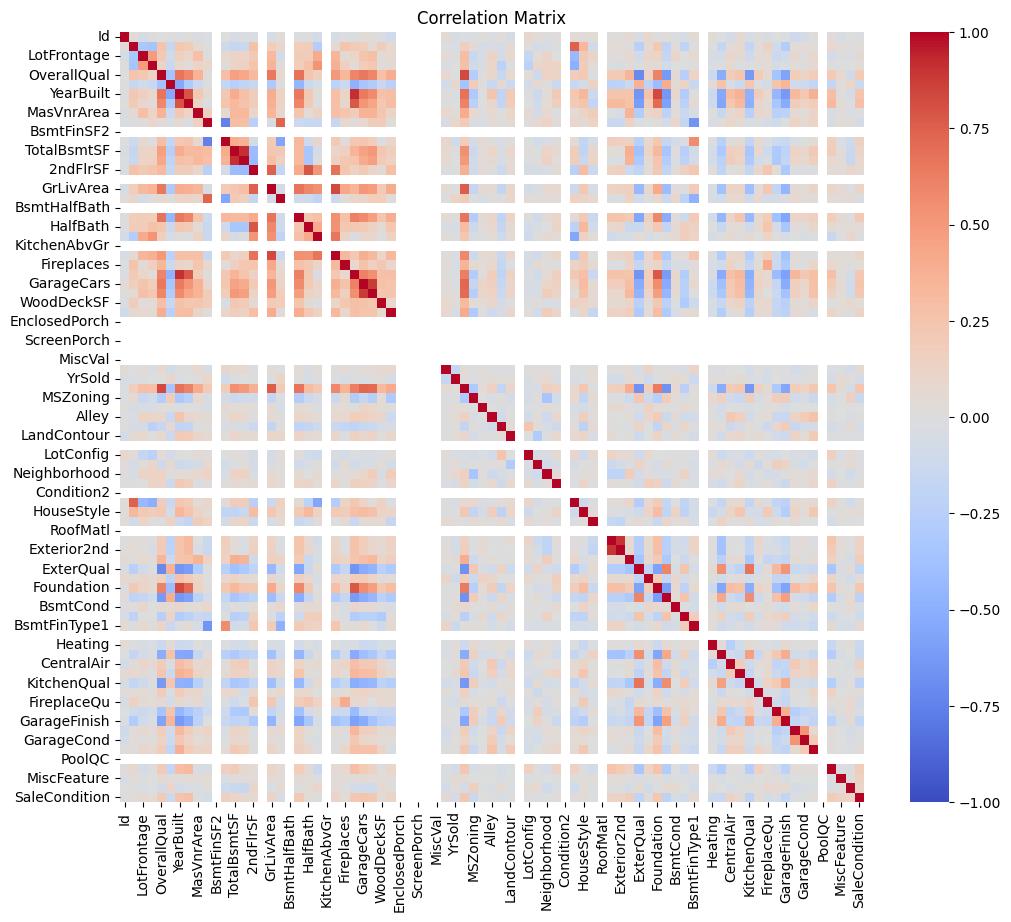

In [ ]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Beberapa poin penting yang bisa diambil dari analisis korelasi di atas antara lain sebagai berikut.

- Ada korelasi positif yang kuat antara variabel tertentu, seperti antara OverallQual dan SalePrice (kolom ini ada tetapi tidak tertulis karena banyaknya fitur) yang menunjukkan bahwa kualitas rumah mungkin berhubungan erat dengan harga jualnya.
- Korelasi negatif atau rendah juga terlihat pada beberapa pasangan variabel, menunjukkan hubungan yang lemah atau tidak ada antara variabel tersebut.

Silakan buat kesimpulan berdasarkan data matriks korelasi di atas dengan catatan sebagai berikut.

- Korelasi Positif: nilai korelasi positif menunjukkan bahwa saat satu variabel meningkat, variabel lain juga cenderung meningkat. Nilai korelasi +1 menunjukkan korelasi positif sempurna.
- Korelasi Negatif: nilai korelasi negatif menunjukkan bahwa saat satu variabel meningkat, variabel lain cenderung menurun. Nilai korelasi -1 menunjukkan korelasi negatif sempurna.
- Korelasi Nol: nilai korelasi 0 menunjukkan bahwa tidak ada hubungan linier antara dua variabel.

Dengan memahami korelasi antar variabel, Anda dapat memilih fitur yang akan dimasukkan ke dalam model machine learning dengan lebih baik serta memahami dinamika data secara lebih mendalam.

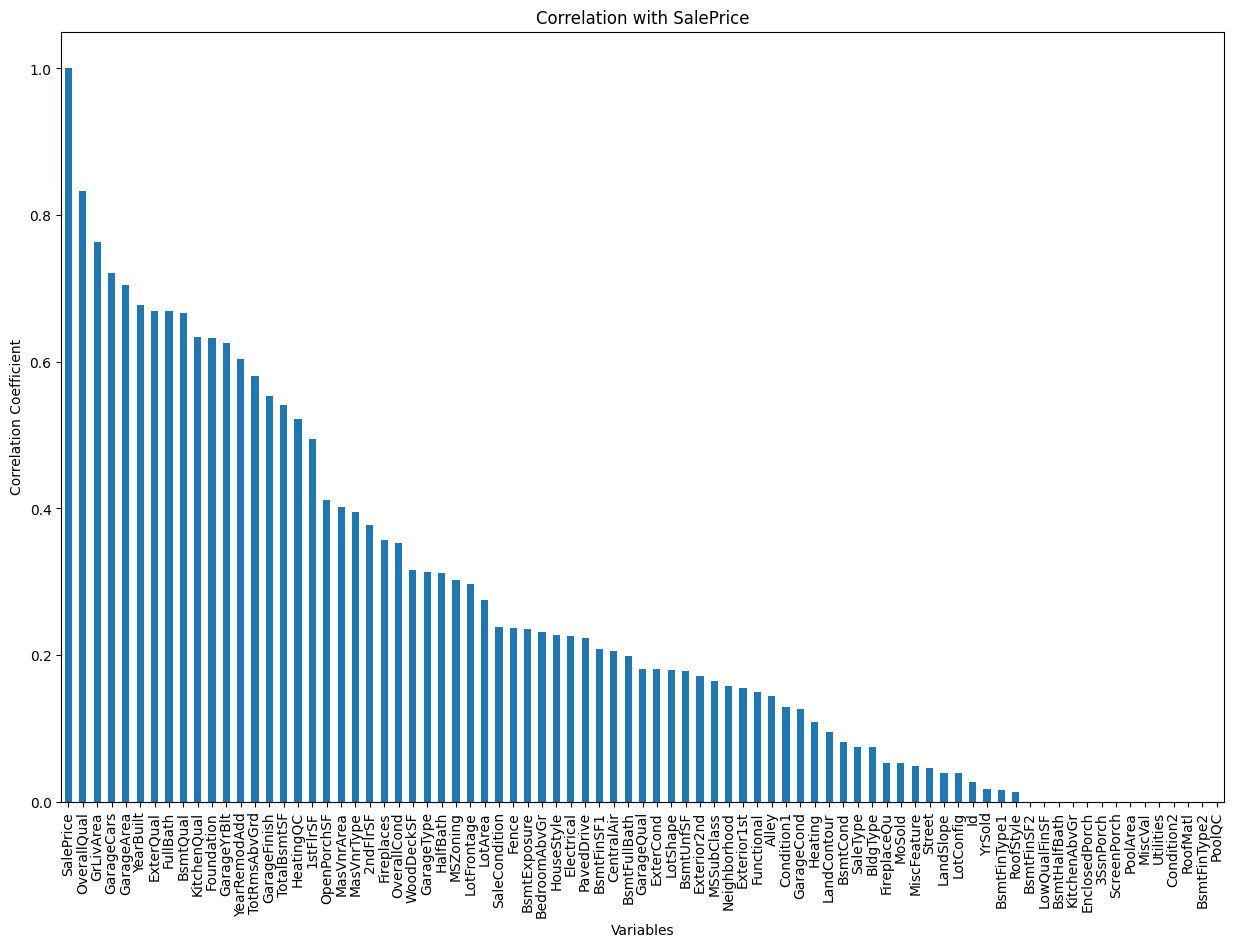

In [ ]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df_lencoder.corr()['SalePrice']

# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# Menampilkan hasil
plt.figure(figsize=(15, 10))
target_corr_sorted.plot(kind='bar')
plt.title('Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

Berdasarkan matriks korelasi dari masing-masing kolom terhadap SalePrice di atas, Anda bisa menentukan threshold atau batasan korelasi untuk menentukan kolom mana saja yang akan dipilih. Tentunya pemilihan kolom tersebut akan menyebabkan perbedaan performa model sehingga Anda perlu melakukan eksplorasi untuk mendapatkan hasil yang terbaik. Dengan kata lain, jika tidak ingin mengurangi kolom karena alasan tertentu tentu Anda dapat menghiraukan tahapan ini.

Jika Anda sudah bisa menyimpulkan hasil dari eksplorasi tersebut, mari kita samakan dengan beberapa kesimpulan berikut.

- **Hubungan antara Luas Ruang Tinggal dan Harga Jual**
Analisis di atas menunjukkan hubungan positif yang kuat antara luas ruang tinggal (GrLivArea) dan harga jual (SalePrice). Properti dengan luas ruang tinggal yang lebih besar cenderung memiliki harga jual yang lebih tinggi.

- **Dampak Luas Garasi**
Korelasi yang moderat antara luas garasi (GarageArea) dan harga jual menunjukkan bahwa properti dengan garasi yang lebih luas memungkinkan untuk dijual dengan harga lebih tinggi.

- **Outliers dan Distribusi**
Outliers yang ditemukan dalam variabel seperti SalePrice dan GrLivArea dapat memberikan wawasan tentang properti-properti yang luar biasa dalam hal harga dan ukuran. Namun, mereka juga bisa menyesatkan analisis jika tidak ditangani dengan benar. Transformasi logaritmik membantu untuk mengatasi hal ini.

- **Pengaruh Signifikan dari Ukuran Properti**
Pengembang properti atau investor harus mempertimbangkan ukuran ruang tinggal dan garasi sebagai faktor utama yang memengaruhi nilai jual.

- **Pengelolaan Outliers**
Outliers yang ditemukan harus dianalisis lebih lanjut untuk memahami apakah mereka mencerminkan kondisi pasar yang unik atau kesalahan dalam data.

## **Data Splitting**

In [ ]:
import sklearn

 Data ini bisa berupa DataFrame atau array yang berisi fitur (X) dan label/target (y). Pada kasus ini, kita sudah memiliki sebuah dataset yang disimpan pada variabel df_lencoder sehingga Anda hanya perlu memisahkan antara atribut dan label pada dataset tersebut.

In [ ]:
# Memisahkan fitur (X) dan target (y)
x = df_lencoder.drop(columns=['SalePrice'])
y = df_lencoder['SalePrice']

Fungsi ini memerlukan beberapa parameter utama:

- **X:** kumpulan atribut atau fitur dari dataset, yaitu semua kolom kecuali kolom target (pada kasus ini SalePrice).
- **y:** target atau label yang akan kita prediksi merupakan kolom yang ingin kita pisahkan (pada kasus ini SalePrice).
- **test_size:** persentase dari data yang akan digunakan sebagai test set. Misalnya, ketika Anda menentukan test_size=0.2, 20% dari data akan menjadi test set, dan 80% sisanya akan menjadi train set.
- **random_state:** parameter yang memastikan pemisahan data yang konsisten setiap kali fungsi tersebut dijalankan. Parameter ini mengontrol pengacakan saat membagi dataset sehingga dengan menetapkan random_state hasil pembagian data (train set dan test set) akan selalu sama. Hal ini penting untuk memastikan eksperimen yang dapat direproduksi dan evaluasi model yang konsisten. Namun, parameter ini juga dapat memiliki kekurangan yaitu model tidak akan menerima inputan baru yang mungkin akan lebih baik dari sebelumnya.

Ketika Anda menjalankan train_test_split, fungsi ini akan mengembalikan empat bagian data seperti berikut.

1. X_train: fitur untuk train set.
2. X_test: fitur untuk test set.
3. y_train: target untuk train set.
4. y_test: target untuk test set.

Ini berarti setelah pemanggilan fungsi, Anda memiliki dua bagian data: satu untuk melatih model (train set) dan satu lagi untuk menguji model (test set).

In [ ]:
from sklearn.model_selection import train_test_split

# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# menghitung panjang/jumlah data
print("Jumlah Data", len(x))

# menghitung panjang/jumlah data pada x_train
print("Jumlah Data Training", len(x_train))

# menghitung panjang/jumlah data pada x_test
print("Jumlah Data Test", len(x_test))

Jumlah Data 557
Jumlah Data Training 445
Jumlah Data Test 112


# **Pembangunan Model (Modelling)**

In [ ]:
# Melatih model 1 dengan algoritma Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

# Melatih model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

# Melatih model 3 dengan algoritma Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(random_state=184)

Model yang telah dilatih perlu melalui tahapan evaluasi berdasarkan validation set untuk melihat seberapa baik ia mampu memprediksi output yang benar dari input yang belum pernah dilihat sebelumnya. Metrik umum untuk evaluasi adalah accuracy, precision, recall, F1-score (untuk klasifikasi), dan Mean Squared Error (MSE) atau R-squared (untuk regresi).

Karena contoh kasus yang sedang kita hadapi merupakan regresi, evaluasi yang akan akan kita gunakan adalah MAE, MSE, dan R2. Untuk melakukan evaluasi ini kita membutuhkan validation set (x_test). Validation test merupakan bagian dari data yang tidak digunakan untuk pelatihan tetapi digunakan untuk mengevaluasi model (unseen data). Mari kita lakukan evaluasi satu per satu.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluasi pada model LARS
pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)


# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517


In [ ]:
# Evaluasi pada model Linear Regression
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

# Menambahkan hasil evaluasi LR ke DataFrame
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517
Linear Regression,0.232973,0.093381,0.883675
Gradient Bossting Regresor,0.217463,0.088164,0.890174


In [ ]:
# Evaluasi pada model Gradient Bossting Regressor
pred_GBR = GBR.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

# Menambahkan hasil evaluasi GBR ke DataFrame
df_results.loc['Gradient Bossting Regresor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517
Linear Regression,0.232973,0.093381,0.883675
Gradient Bossting Regresor,0.217463,0.088164,0.890174


 Seperti yang dapat Anda lihat dari beberapa kode di atas memiliki struktur yang sama, yaitu **.predict()** dan beberapa metriks evaluasi seperti MAE, MSE, dan R2. Mari kita pelajari apa fungsi dari masing-masing function tersebut.

- **.predict():** fungsi .predict() pada scikit-learn digunakan untuk membuat prediksi berdasarkan model yang telah dilatih. Setelah Anda melatih model dengan data pelatihan (menggunakan .fit() pada materi sebelumnya), Anda dapat menggunakan .predict() untuk menghasilkan nilai prediksi pada data baru atau data testing.

- **mean_absolute_error:** MAE mengukur rata-rata dari kesalahan absolut antara nilai prediksi dan nilai aktual. Ini adalah ukuran yang intuitif karena langsung menghitung seberapa jauh prediksi dari nilai sebenarnya tanpa memperhitungkan arah (positif atau negatif).

- **mean_squared_error:** MSE mengukur rata-rata dari kuadrat kesalahan antara nilai prediksi dan nilai aktual. Karena kesalahan dikuadratkan, MSE memberikan penalti (nilai error) yang lebih besar untuk kesalahan yang lebih besar, membuatnya lebih sensitif terhadap outlier.

- **r2_score:** R² adalah metrik statistik yang menunjukkan seberapa baik nilai prediksi mendekati nilai aktual. R² mengukur proporsi varians dari target yang dapat dijelaskan oleh fitur dalam model.

Nah, berdasarkan hasil evaluasi terhadap unseen data di atas, tentunya Anda sudah lebih yakin terhadap performa model yang telah dibangun. Lalu, manakah model yang Anda pilih berdasarkan latihan di atas? Jika memilih GradientBoostingRegressor berarti Anda sudah memahami arti dari masing-masing nilai evaluasi di atas. Selanjutnya mari kita selesaikan latihan machine learning workflow yang sangat panjang ini dengan menyimpan model agar dapat digunakan pada lingkungan produksi.

# **Menyimpan Model**

Joblib adalah pilihan yang disarankan untuk menyimpan model scikit-learn karena lebih efisien dalam menyimpan objek model yang besar.

In [ ]:
import joblib

# Menyimpan model ke dalam file
joblib.dump(GBR, 'gbr_model.joblib')

['gbr_model.joblib']

Pickle adalah modul standar Python yang dapat digunakan untuk menyimpan hampir semua objek Python termasuk model machine learning.

In [ ]:
import pickle

# Menyimpan model ke dalam file
with open('gbr_model.pkl', 'wb') as file:
    pickle.dump(GBR, file)

In [ ]:
# Memuat model dari file joblib
joblib_model = joblib.load('gbr_model.joblib')

# Memuat model dari file pickle
with open('gbr_model.pkl', 'rb') as file:
    pickle_model = pickle.load(file)